# Big Data y Machine Learning para clasificación de galaxias

## Máster Big Data Aplicado & Business Analytics

#### Autor:
##### Félix Eduardo Rodríguez Lagonell

---

### Índice

- [Introducción](#intro)
    - [Astronomía y Big Data](#astro)
    - [Las Galaxias](#galaxias)
        - [Galaxias elípticas](#e07)
        - [Galaxias lenticulares](#s0)
        - [Galaxias espirales](#sa)
        - [Galaxias espirales barradas](#sb0/ad)
        - [Galaxias espirales intermedias](#sab0)
        - [Galaxias irregulares](#irr)
    - [GalaxyZoo](#zoo)
    - [Sloan Digital Sky Survey](#sdss)
- [Herramientas Cloudera](#herramientas)
- [Configuración Cloudera](#conf)
    - [Imagen y contenedor Docker](#docker)
    - [Instalación de paquetes](#pkt)
        - [wget](#wget)
        - [Cloudera Manager](#manager)
        - [Anaconda](#anaconda)
        - [Java 8 JDK](#java8)
        - [Spark2](#spark2)
- [Descarga de datos](#data)
    - [Dataset de parámetros e instrumentación](#data1)
    - [Dataset GalaxyZoo](#data2)
    - [Dataset de imágenes](#data3)
- [Almacenamiento HDFS](#hdfs)
- [Almacenamiento HIVE - HUE - IMPALA](#hue-impala)
    - [Dataset SDSS_PhotObj](#phot)
    - [Dataset SDSS_SpecObj](#spec)
    - [Modelo relacional](#relacional)
        - [HIVE: External Table](#hive-external)
        - [HIVE: Optimized Row Columnar](#hive-orc)
    - [Administración HUE](#hue)
        - [HUE Queries](#hue-queries)
        - [HUE: Optimized Row Columnar](#hue-orc)
        - [HUE: Filtrado de datos](#hue-filtrado)
    - [Analítica HIVE - SPARK](#hive-spark)
- [Docker - Spark](#all-spark)
    - [Jupyter Docker Stacks](#jds)
- [Dataset de imágenes galácticas](#imagenes)
    - [Script de imágenes](#script)
- [Machine Learning - SPARK](#ml)
    - [Carga de datos CSV](#load)
    - [Filtrado de imágenes no clasificadas](#filtrado)
    - [Principal Component Analysis](#pca)
    - [Regresión Logística](#lr)
    - [Red Neuronal - Perceptrón Multicapa](#perceptron)
- [Conclusión final](#conclusion)
    - [Posibles mejoras](#mejoras)
    - [Dificultades y limitaciones](#dificultades)

    
<div id='xx' />

<div id='intro' />

## Introducción

Nuestro Universo está poblado por miles de millones de galaxias y cada una de ellas formada por miles de millones de estrellas. Los telescopios, situados tanto en satélites como en La Tierra, observan el cielo y toman una enorme cantidad de fotos digitales que luego los científicos estudian para entender cómo nacen las galaxias, cómo interaccionan entre ellas, cómo el Universo en su conjunto se ha formado y cómo va cambiando. El objetivo último de todo este proceso es llegar a formular las leyes que dictan la evolución del Universo.

Para este trabajo se ha seleccionado un conjunto de datos perteneciente a un proyecto llamado **Galaxy Zoo**. A lo largo de este módulo final desarrollaremos los pasos para analizar éstos datos con una gran parte de las herramientas Big Data que hemos aprendido en módulos anteriores, y que sin duda nos ayudará a explorar y conocer el Universo en el que vivimos.

<div id='astro' />

### Astronomía y Big Data

Potentes telescopios escanean el cielo y recogen fotos en formato digital de estrellas y galaxias lejanas. Son capaces de recoger imágenes de objetos celestes que a simple vista no podríamos observar. Aún así solo tenemos información de una pequeña fracción de la enorme cantidad (centenares de miles de millones) de galaxias que pueblan nuestro Universo. La Cosmología es la ciencia que estudia cómo el Universo ha nacido y evolucionado y tiene como objetivo entender cuál podría ser su destino. Conocer los distintos tipos de galaxias y clasificar su forma es uno de los pasos fundamentales para el avance en el conocimiento del Universo en que vivimos.

La clasificación de imágenes de galaxias basada en su forma es el objetivo final de este trabajo. Para alcanzarlo tendremos que aplicar algunas de la técnicas de análisis y clasificación Big Data que hemos aprendido durante este curso.

<div id='galaxias' />

### Las Galaxias

El Sol es una de las muchas estrellas que forman parte de nuestra galaxia: la Vía Láctea. Observando las estrellas más lejanas podemos ver cómo se agrupan formando galaxias de distintas forma y tamaño. Su forma, tamaño y brillo nos revelan cómo se forman y cómo evolucionan. Existen muchas maneras de clasificar las galaxias, por ejemplo por el color o el brillo, pero la más común es por su foma, que depende de su edad, composición, etc. 

Clasificar una galaxia por su forma no es siempre tarea fácil. Los tipos más reconocibles de galaxias son las espirales y las elípticas pero hay muchísimos estados intermedios, algunas con forma irregular que, junto con el tamaño, la orientación del objeto y la resolución de la imagen, pueden dificultar el trabajo del clasificador. Al contrario que el color, el brillo o la distancia, que son propiedades cuantitativas y pueden medirse de manera directa, la forma es mucho más difícil de valorar y depende de criterios más subjetivos.

Según el **esquema de Hubble** o **diagrama diapasón**, como también se le suele llamar, podemos hacer la siguiente clasificación:

---

<img src="../images/hubble.png">

---

<div id='e07' />

#### Galaxias elípticas (E0-7) 

Tienen forma elíptica, con una distribución bastante uniforme de las estrellas por todas partes. El número indica el grado de excentricidad: las galaxias E0 son casi redondas, mientras E7 son muy aplanadas. El número indica solo la apariencia de la galaxia en el cielo, no su geometría real.

<div id='s0' />

#### Galaxias lenticulares (S0 y SB0) 

Parecen tener una estructura de disco con una concentración de estrellas central proyectándose de él. No muestran ninguna estructura espiral.

<div id='sa' />

#### Galaxias espirales (Sa-d) 

Tienen una concentración de estrellas central y un disco aislado que presenta brazos espirales. Los brazos están centrados alrededor de la protuberancia, variando de los muy arremolinados y poco definidos (Sa) a los muy sueltos y definidos (Sc y Sd). Así mismo, mientras que en las primera la concentración central es muy pronunciada, en estos últimos lo es bastante menos, y (salvo excepciones) la cantidad de estrellas jóvenes y la proporción de gas van aumentando a lo largo de la secuencia.

<div id='sb0/ad' />

#### Galaxias espirales barradas (SB0/a-d) 

Tienen una estructura en espiral, similar a las galaxias espirales pero los brazos se proyectan desde el final de una "barra" central en lugar de emanar de una concentración central. De nuevo, SBa a SBd indica como de arremolinados están estos brazos y el grado de desarrollo de la concentración central y (de nuevo y salvo excepciones) la cantidad de gas y estrellas jóvenes va aumentando al ir progresando en la secuencia.

<div id='sab0' />

#### Galaxias espirales intermedias (SAB0/a-c) 

Tienen una morfología intermedia entre las galaxias espirales y las galaxias espirales barradas.

<div id='irr' />

#### Galaxias irregulares (Irr) 

Se dividen en Irr-I, que muestran estructura espiral deformada, e Irr-II para las galaxias que no encajan en ninguna otra categoría.

<div id='zoo' />

### Galaxy Zoo

El proyecto Galaxy Zoo consiste en recolectar datos sobre la forma del mayor número posible de objetos celestes. Para llevar a cabo esa tarea el proyecto cuenta con la colaboración de voluntarios que, a través de una página web, visualizan las imágenes de galaxias en su ordenador personal y clasifican el objeto fotografiado. El resultado se envía a través de la misma página web.

En la página de [Galaxy Zoo](https://www.zooniverse.org/projects/zookeeper/galaxy-zoo/) se puede acceder a un tutorial en inglés donde se explican los objetos representados en las imágenes y los criterios para llevar a cabo la clasificación.

- Una galaxia *ELÍPTICA*, cuyo brillo va disminuyendo gradualmente desde el centro de la imagen.

<img src="../images/eliptica.png">

- La imagen tiene estructuras que pueden ser:
    - Los brazos de una galaxia *ESPIRAL*.
    
    ---
    
    <img src="../images/espiral.png">
    
    ---
    
    - Un núcleo, o unas barras, u otras características peculiares.
    
    ---

    <img src="../images/otras1.png">

    <img src="../images/otras2.png">
    
    ---
   
    - Una estrella, una traza de satélite o algún otro artefacto que obstaculice la posibilidad de clasificar el objeto.
    
    ---
    
    <img src="../images/erronea1.png">

    <img src="../images/erronea2.png">
    
    ---
    
En el proyecto GalaxyZoo original los voluntarios tenían que distinguir entre objetos elípticos, espiral horaria, espiral antihoraria, casos intermedios, estrella no identificable o fusión de objetos. Para este proyecto vamos a adoptar una versión de clasificación más simple ya que únicamente distinguiremos los objetos de forma elíptica. Dicho de otra forma, distinguiremos entre objetos sin estructura y objetos con forma espiral.

<div id='sdss' />

###  Sloan Digital Sky Survey

Las imágenes son tomadas por los telescopios de un proyecto llamado Sloan Digital Sky Survey (SDSS). Al visitar la [web](https://www.sdss.org/) del proyecto tendremos acceso a los datos así como a un repositorio extenso de documentación y herramientas sobre astronomía.

<div id='herramientas' />

## Herramientas Cloudera

Con la idea de presentar un proyecto Big Data de principio a fin hemos decidido que para el desarrollo de este trabajo usaremos las siguientes herramientas.

#### Docker - Cloudera

Se ha optado por configurar un contenedor *Docker* corriendo la versión **cloudera-quickstart-vm-5.13.0**. La elección de docker frente a una máquina virtual se basa en su facilidad de despliegue, configuración, portabilidad y la posibilidad de aprovechar los recursos de la máquina host al máximo, que en nuestro caso se trata de un portátil de 8 cores y 16GB RAM.

#### HDFS

HDFS y sus comandos de consola para el almacenamiento y la ingestión de datos.

#### HIVE - IMPALA - HUE

Herramientas para la creación del modelo de datos, la importación de los datos externos, su exploración preliminar y su análisis posterior.

#### SPARK - Anaconda

Notebooks de pyspark para el desarrollo de algoritmos, análisis, visualización e interpretación de los resultados.

<div id='conf' />

## Configuración Cloudera

Nota: a partir de ahora seguiremos la siguiente nomenclatura para la escritura en consola.

~~~
$ se refiere a comandos a ejecutar en la máquina (host) que aloja nuestro contenedor.
[container]$ indica comandos a ejecutar en la shell de nuestro contenedor como usuario root (si no se indi- ca lo contrario)
[hive]$ [spark2]$ [etc]$ -> otras alternativas dependiendo del entorno dentro de nuestro contenedor si fue- ra  necesario.
~~~

<div id='docker' />

#### Imagen y contenedor Docker

Empezaremos la configuración de nuestro entorno partiendo del hecho de que *Docker* ya se encuentra instalado y totalmente configurado, por lo tanto procedemos a descargar la imagen de *Cloudera* directamente desde sus repositorios.


`
$ wget https://downloads.cloudera.com/demo_vm/docker/cloudera-quickstart-vm-5.13.0-0-beta-docker.tar.gz
$ tar xzf cloudera-quickstart-vm-*-docker.tar.gz
$ docker import cloudera-quickstart-vm-5.13.0–0-beta-docker.tar
$ docker tag <image_name> cloudera/quickstart:5.13.0
`


Una vez importada la imagen pasamos a arrancar nuetro contenedor mediante el comando `run`. 

- --name indica el nombre del contenedor.
- --hostname indica el nombre del host.
- --privileged=true para que nuestro contenedor tenga permisos sobre nuestra máquina.
- --publish-all=true para exponer todos los puertos.
- -p mapea los puertos de nuestro host con los del contenedor.


`
$ docker run -d -i -t --name cloudera-spark2-anaconda --hostname=quickstart.cloudera --privileged=true --publish all=true -p 10002:10002 -p 55489:55489 -p 8888:8888 -p 10000:10000 -p 10020:10020 -p 11000:11000 -p 18080:18080 -p 18081:18081 -p 18088:18088 -p 19888:19888 -p 21000:21000 -p 21050:21050 -p 2181:2181 -p 25000:25000 -p 25010:25010 -p 25020:25020 -p 50010:50010 -p 50030:50030 -p 50060:50060 -p 50070:50070 -p 50075:50075 -p 50090:50090 -p 60000:60000 -p 60010:60010 -p 60020:60020 -p 60030:60030 -p 7180:7180 -p 7183:7183 -p 7187:7187 -p 80:80 -p 8020:8020 -p 8032:8032 -p 8042:8042 -p 8088:8088 -p 8983:8983 -p 9083:9083 -p 8889:8889 cloudera-spark2-anaconda/quickstart:5.13.0 /usr/bin/docker-quickstart
`

Una vez nuestro contenedor se encuentre en ejecución podremos acceder mediante el comando 

`
$ docker exec -it cloudera-spark2-anaconda bash
`

<div id='pkt' />

#### Instalación de paquetes

Antes que nada instalaremos una serie de paquetes necesarios para llevar a cabo la configuración.

<div id='wget' />

##### wget

Necesario para la descarga de paquetes desde consola.

`
[container]$ yum install wget
`

<div id='manager' />

###### Cloudera Manager

Cloudera Manager es una plataforma de administración de Cloudera open source, para la gestión de clusters HADOOP. Este tipo de frameworks facilitan la gestión manual que supone la administración de un clúster, ya que se trata de un trabajo complicado y bastante propenso a errores. Pensar en todos los pasos que hay que seguir en cada nodo: instalación del paquete de hadoop, configuración de variables de entorno, definición de archivos de configuración, definir permisos y reglas de seguridad, levantar demonios, formateo del sistema HDFS, etc. 

Cloudera Manager no viene activa por defecto:

`
[container]$ service cloudera-scm-server status
`

Lo cual nos pedirá ejecutar el siguiente comando:

`
[container]$ /home/cloudera/cloudera-manager --express
`

La opción `--express` indica que vamos a instalar la versión Cloudera Express (free). Para instalar la versión Enterprise debemos seleccionar la opción `--enterprise`. Finalizado el proceso podemos acceder a la interfaz web http://localhost:7180 con el usuario/contraseña por defecto *cloudera*.

---

<img src="../images/cloudera-manager.png">

---

<div id='anaconda' />

##### Anaconda

Instalaremos Anaconda como entorno principal para la analítica de datos. Hay que mencionar que la versión de Python instalada por defecto en el sistema **cloudera-quickstart-vm-5.13.0** es la 2.6. Con la instalación de Anaconda se instalará en paralelo Python 3.7.

En primer lugar crearemos un directorio de trabajo donde escribiremos el siguiente script de instalación llamado `setup_pyspark.sh`

`
[container]$ mkdir /home/cloudera/galaxias
[container]$ vim setup_pyspark.sh
`

~~~
#!/bin/bash

ANACONDA_FILE=Anaconda3-2020.02-Linux-x86_64.sh
ANACONDA_LOCAL_FILE=/tmp/$ANACONDA_FILE
ANACONDA_REMOTE_FILE=https://repo.anaconda.com/archive/$ANACONDA_FILE
ANACONDA_MD5=17600d1f12b2b047b62763221f29f2bc

# Download and install Anaconda
CONDA_VERSION=$(conda --version 2> /dev/null)
if [ "$CONDA_VERSION" != "conda 4.2.9" ]
then
  curl -o $ANACONDA_LOCAL_FILE $ANACONDA_REMOTE_FILE
  FILE_MD5=$(md5sum $ANACONDA_LOCAL_FILE | awk '{print $1}')
  if [ "$ANACONDA_MD5" != "$FILE_MD5" ]
  then
      echo "Download of file: $ANACONDA_FILE failed, try again"
      rm $ANACONDA_FILE
      exit 1
  fi
  bash $ANACONDA_LOCAL_FILE
  rm -f $ANACONDA_LOCAL_FILE
  
  # Add environment variables to .bashrc
  if ! grep -Fq "PYSPARK_DRIVER_PYTHON=" ~/.bashrc
  then
    echo 'export PYSPARK_DRIVER_PYTHON=jupyter' >> ~/.bashrc
  fi
  if ! grep -Fq "PYSPARK_DRIVER_PYTHON_OPTS=" ~/.bashrc
  then
    echo "export PYSPARK_DRIVER_PYTHON_OPTS='notebook --allow-root --ip=0.0.0.0 --port=55489 --notebook-dir=/home/cloudera/galaxias'" >> ~/.bashrc
  fi
else
  echo "Anaconda already installed and at the convenient version"
fi

# Source .bashrc to set environement variables and add Anaconda binaries to path
. ~/.bashrc
~~~

---

Con dicho script instalamos Anaconda3 y configuramos las variables de entorno que servirán de conector con SPARK (PYSPARK_DRIVER_PYTHON y PYSPARK_DRIVER_PYTHON_OPTS). Básicamente indicamos que se inicie SPARK en un notebook de jupyter en localhost en el puerto 55489 y que nuestro directorio raíz de trabajo sea `home/cloudera/galaxias`. 

Podemos elegir otro puerto sobre el que ejecutar nuestro notebook. El único requisito a tener en cuenta es que no puede ser alguno de los ya utilizados por Cloudera. De no indicar esta opción, no podríamos arrancar nuestros notebooks ya que el puerto por defecto 8888 entraría en conflicto con el de HUE. Además, debemos tener en cuenta estas circunstancias a la hora de arrancar nuestro contenedor pues todos los puertos a los que posteriormente accederemos deberán de estar expuestos hacia el host (esto es con la opción `-p` del comando `docker run`).

---

<img src="../images/anaconda_install_1.png">

<img src="../images/anaconda_install_2.png">

<img src="../images/anaconda_install_3.png">

<img src="../images/anaconda_install_4.png">

<img src="../images/anaconda_install_5.png">
    
---

Y nuestro `~/.bashrc` quedaría tal que:

---

<img src="../images/bashrc.png">
    
---

Por último, podríamos exportar el directorio de Anaconda al PATH de `~/.bash_profile` tal como se muestra en la imagen de la siguiente sección.

<div id='java8' />

###### Java 8 JDK

La versión de java instalada por defecto es la 1.7. Para instalar SPARK2 debemos instalar la versión 1.8 o superior. En nuestro caso instalaremos la versión 8 ya que puede coexistir junto a la versión 1.7 (no será necesario desinstalarla). Debemos parar los servicios de Clodera Manager antes de hacer la instalación.

`
[container]$ service cloudera-scm-server stop
[container]$ service cloudera-scm-agent stop
[container]$ java -version
java version "1.7.0_67"
Java(TM) SE Runtime Environment (build 1.7.0_67-b01)
Java HotSpot(TM) 64-Bit Server VM (build 24.65-b04, mixed mode)
[container]$ which java
/usr/bin/java
[container]$ cd /usr/java/
[container]$ wget https://download.java.net/openjdk/jdk8u41/ri/openjdk-8u41-b04-linux-x64-14_jan_2020.tar.gz
[container]$ tar xvf openjdk-8u41-b04-linux-x64-14_jan_2020.tar.gz
[container]$ mv java-se-8u41-ri/ java8
`

Con esto tenemos la versión de java 1.8 disponible dentro del directorio `/usr/java/java8`. Ahora añadiremos las variables de entorno a nuestro archivo `~/.bash_profile`. Debería quedar así:

---

<img src="../images/bash_profile.png">
    
---

Además debemos exportar la nueva configuración JDK al Cloudera Manager Server. Al final del archivo `/etc/default/cloudera-scm-server` escrimos la siguiente sentencia `export JAVA_HOME=/usr/java/java8`

---

<img src="../images/java_scm.png">
    
---

Para finalizar reiniciamos nuestra configuracion e iniciamos los servicios.

`
[container]$ . ~/.bash_profile
[container]$ java -version
openjdk version "1.8.0_41"
OpenJDK Runtime Environment (build 1.8.0_41-b04)
OpenJDK 64-Bit Server VM (build 25.40-b25, mixed mode)
[container]$ service cloudera-scm-server start
[container]$ service cloudera-scm-agent start
`

<div id='spark2' />

##### Spark2

Para instalar SPARK2 debemos entender el concepto de *parcel*. Los parcels son paquetes de software distribuidos por Cloudera Manager, de tal manera que a través de la propia interfaz de Cloudera Manager podemos descargar, distribuir y activar nuevo software. En definitiva, los parcels contienen los binarios necesarios que serán usados por Cloudera Manager para desplegar el nuevo software en nuestro clúster.

Para nuestro caso de uso instalaremos la versión 2.4 release 2 (SPARK2_ON_YARN-2.4.0.cloudera2.jar). Podemos encontras más información en los siguientes enlaces:

- [CDS Powered by Apache Spark](https://docs.cloudera.com/documentation/spark2/latest/topics/spark2_installing.html)
- [CDS Powered by Apache Spark Requirements](https://docs.cloudera.com/documentation/spark2/latest/topics/spark2_requirements.html)
- [Download Information](https://docs.cloudera.com/documentation/spark2/latest/topics/spark2_packaging.html#versions)

`
[container]$ cd /opt/cloudera/csd/
[container]$ wget http://archive.cloudera.com/spark2/csd/SPARK2_ON_YARN-2.4.0.cloudera2.jar
[container]$ chown cloudera-scm:cloudera-scm SPARK2_ON_YARN-2.4.0.cloudera2.jar
[container]$ chmod 644 SPARK2_ON_YARN-2.4.0.cloudera2.jar
`

Asignamos el fichero al usuario 'cloudera' y le damos permisos 644 para que sea manipulado por Cloudera Manager. 

A continuación nos vamos a http://localhost:7180 donde navegaremos hasta la sección `Hosts/AllHosts`. Seleccionamos la pestaña *Configuration*

---

<img src="../images/cloudera_1_allhosts.png">
    
---

Buscamos *java* en el recuadro de búsqueda y ponemos el directorio de instalación de java `/usr/java/java8`.

---

<img src="../images/cloudera_2_java.png">
    
---

Navegamos a `Hosts/Parcels` y volvemos a seleccionar la pestaña *Configuration*. Bajamos hasta el final y quitamos la pestaña *Validate Parcel Relations*.

---

<img src="../images/cloudera_4_parcels.png">
    
---

Reiniciamos los servicios para aplicar la nueva configuración.

`
[container]$ service cloudera-scm-agent restart
[container]$ service cloudera-scm-server restart
`

Al volver a la sección de *Parcels* dentro de Cloudera Manager vemos que se ha tenido que añadir el parcel relativo a SPARK2. Lo descargamos y lo activamos.

---

<img src="../images/cloudera_5_down_spark2.png">

<img src="../images/cloudera_6_distribute_spark2.png">

<img src="../images/cloudera_7_act_spark2.png">
    
---

Repetimos el procedimiento con el parcel CDH 5 para poder desplegar en el clúster (incluso aunque nuestro entorno sea un contenedor docker standalone).

---

<img src="../images/cloudera_10_act_cdh.png">

---

En el dashboard principal (izquierdo) *Cloudera QuickStart (CDH 5.13.0, Parcels)* añadimos el servicio SPARK2 y seleccionamos todas sus dependencias y los nodos sobre los que aplicar.

---

<img src="../images/cloudera_11_add_service.png">

<img src="../images/cloudera_12_add_spark2.png">

<img src="../images/cloudera_13_add_spark2.png">

<img src="../images/cloudera_14_select_host.png">

<img src="../images/cloudera_15_add_spark2.png">

<img src="../images/cloudera_16_add_spark2.png">

---

Finalmente reiniciamos Cloudera Manager y desplegamos la nueva configuración.

`
[container]$ service cloudera-scm-agent restart
[container]$ service cloudera-scm-server restart
`

---

<img src="../images/cloudera_17_deploy_client_conf.png">

---

Una vez terminado todo el proceso podemos ir a nuestra consola y comprobar que la instalación ha sido correcta:

`
[container]$ pyspark2 --version
`
~~~
Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  ._/
   /___/ .__/\_,_/_/ /_/\_\   version 2.4.0.cloudera2
      /_/
                        
Using Scala version 2.11.12, OpenJDK 64-Bit Server VM, 1.8.0_41
~~~

Y para finalizar podremos ejecutar nuestro jupyter notebook automáticamente tecleando en consola `pyspark2`

<div id='data' />

## Descarga de datos

Primero que nada debemos descargar nuestro datos en el contenedor y, posteriormente, almacenarlos en HDFS.

Descargaremos varios ficheros `.csv` que consisten en un sub-conjunto de datos de la web del proyecto [SDSS](https://www.sdss.org/) almacenados en un repositorio de la UAB. En concreto descargaremos los datos relativos a la *Data Realease 14*: [link1](https://www.sdss.org/dr14/) y [link2](http://skyserver.sdss.org/dr14/en/tools/toolshome.aspx). Éstos datos contendrán información delativa al brillo del objeto, características del telescopio, etc.

Las imágenes de galaxias tomadas para este proyecto son descargadas como imágenes `png` de 64x64 píxeles en color en base a un script para luego ser procesadas y almacenadas en un fichero.

- [SDSS DR14 Finding Chart Tool](https://skyserver.sdss.org/dr14/en/tools/chart/chartinfo.aspx)
- [SDSS Science Archive Server (SAS)](https://dr14.sdss.org/comingsoon/imaging/field/search)

---

<img src="../images/galaxias.png">

---

Las imágenes que descargaremos serán aquellas que corresponden al dataset del proyecto *GalaxyZoo* y por lo tanto tendremos la certeza de que contamos con una clasificación del tipo de galaxia.

<div id='data1' />

#### Dataset: parámetros e instrumentación

Mediante estas sencillas instrucciones descargaremos los datos (trabajaremos dentro del directorio `/home/cloudera/`):

`
[container]$ mkdir -p /home/cloudera/galaxias/data
[container]$ cd /home/cloudera/galaxias/data
[container]$ wget https://nebula.uab.cat/share/proxy/alfresco-noauth/api/internal/shared/node/7mRDxMhySJu0OMG0drr1MA/content/SDSS_parametros.zip
[container]$ unzip SDSS_parametros.zip
[container]$ tree /home/cloudera/galaxias/data
`

~~~
galaxias/data/
├── SDSS_PhotObj.csv
└── SDSS_SpecObj.csv
~~~

---

<div id='data2' />

#### Dataset: GalaxyZoo

El [dataset](https://data.galaxyzoo.org/) de GalaxyZoo representa el conjunto de datos principal de este proyecto por dos motivos. En primer lugar es el que contiene la correlación entre el `id` del objeto (nuestra imagen) y la clasificación de los usuarios. Y en segundo lugar es el que utilizaremos para seleccionar las imágenes que vamos a descargar.

`
[container]$ cd /home/cloudera/galaxias/data
[container]$ wget http://galaxy-zoo-1.s3.amazonaws.com/GalaxyZoo1_DR_table2.csv.zip
[container]$ unzip GalaxyZoo1_DR_table2.csv.zip
[container]$ tree /home/cloudera/galaxias/data
`

~~~
galaxias/data/
├── GalaxyZoo1_DR_table2.csv
├── SDSS_PhotObj.csv
└── SDSS_SpecObj.csv
~~~

---

<div id='data3' />

#### Dataset: conjunto de imágenes

Desarrollaremos un script para la descarga de imágenes que posteriormente utilizaremos para entrenar nuestros modelos de clasificación.

La mayoría de algoritmos de machine learning necesitan que los datos estén organizados de forma tabular, con las observaciones (imágenes en nuestro caso) distribuidas por filas y los parámetros (píxeles) de cada observación en columnas. Así pues, convertiremos las imágenes en un vector de `64x64 = 4096` posiciones en base a los siguientes pasos:

- Convertir las imágenes en color a una imagen en blanco y negro. Cada uno de los píxeles de la imagen contiene 3 valores entre 0 y 255 correspondientes a los 3 canales RGB (R=Rojo, G=Verde, B=azul). Podríamos decir que cada imagen está compuesta por tres matrices `64x64: MR, MG, MB` correspondientes a los canales R, G, B respectivamente. Aplicaremos la siguiente formula para fusionar las tres matrices en una sola matriz en tono de grises: `M = 0.2989 * MR + 0.5870 * MG + 0.1140 * MB`


- Aplanamos la matriz `M` a un vector, esto es, reorganizamos los valores de la matriz `M` de dimensiones `64x64` a un vetor de longitud `4096`.


- Algunos algoritmos funcionan mejor si todas las variables se encuentran dentro del mismo rango de valores, típicamente `[-1, 1] o [0, 1]`. Por ello normalizamos los valores del vector dividiendolos entre 255.


- Para poder entrenar un algoritmo de clasificación también necesitaremos los *targets* de las observaciones. Éstas se obtienen de las clasificaciones del dataset de GalaxyZoo y tienen los siguientes valores:


    - target = 0 -> clase = incierto
    - target = 1 -> clase = elíptica
    - target = 2 -> clase = espiral
    
- Juntamos los dos conjuntos de datos en un solo fichero que contiene tanto los *features* como el *target*. Este conjunto de datos tiene los campos:


    - drobjid: identificador del objeto.
    - target: clase del objeto.
    - F0 a F4095: correspondiente al vector de 4095 atributos de la imagen.
    
El desarrollo de este apartado la llevaremos a cabo en la segunda parte de este trabajo.

<div id='hdfs' />

## Almacenamiento HDFS

Para comunicarse con el sistema distribuido de ficheros de HADOOP (HDFS), existen una serie de comandos de shell proporcionados por el mismo sistema. Lo primero que vamos a hacer es crear un directorio en el HDFS para cada uno de los ficheros que posteriormente vamos a analizar. Para la creación de un directorio en HDFS utilizamos el siguiente comando:

---

`[container]$ hdfs dfs -mkdir /user/cloudera/galaxias
 mkdir: Permission denied: user=root, access=WRITE, inode="/user/cloudera":cloudera:cloudera:drwxr-xr-x
`

---

Vemos que no podemos escribir sobre ese destino en el HDFS como usuario 'root' ya que pertenece al usuario 'cloudera'. Además no es muy aconsejable trabajar con 'root' en HDFS. En definitiva cambiamos a usuario 'impala' y nuestro directorio destino (posteriormente veremos el motivo de esta elección):

---

`
[container]$ su impala
[container]$ pwd
/home/cloudera/galaxias
[container]$ hdfs dfs -mkdir /user/hive/galaxias
[container]$ hdfs dfs -ls /user/hive
Found 2 items
drwxr-xr-x   - impala supergroup          0 2020-05-23 13:25 /user/hive/galaxias
drwxrwxrwx   - hive   supergroup          0 2020-05-22 22:07 /user/hive/warehouse
`

---

Creamos un directorio para cada uno de los archivos de datos dentro de HDFS de igual manera que hicimos en el caso anterior:

---

`
[container]$ hdfs dfs -mkdir /user/hive/galaxias/SDSS_PhotObj
[container]$ hdfs dfs -mkdir /user/hive/galaxias/SDSS_SpecObj
`

---

El motivo de haber creado un directorio para cada fichero se explicará más adelante a la hora de modelizar los datos.

A continuación, para realizar la carga o ingestión de los datos desde el directorio local hasta el directorio que acabamos de crear en el HDFS usamos el comando `put`:

---

`
[container]$ hdfs dfs -put data/SDSS_PhotObj.csv /user/hive/galaxias/SDSS_PhotObj/SDSS_PhotObj.csv
[container]$ hdfs dfs -put data/SDSS_SpecObj.csv /user/hive/galaxias/SDSS_SpecObj/SDSS_SpecObj.csv
`

---

Y podemos comprobar que ambos ficheros se han creado correctamente:

---

`
[container]$ hdfs dfs -ls /user/hive/galaxias/SDSS_PhotObj/
Found 1 items
-rw-r--r--   1 impala supergroup  1248036 /user/hive/galaxias/SDSS_PhotObj/SDSS_PhotObj.csv
[container]$ hdfs dfs -ls /user/hive/galaxias/SDSS_SpecObj/
Found 1 items
-rw-r--r--   1 impala supergroup  1248036 /user/hive/galaxias/SDSS_SpecObj/SDSS_SpecObj.csv
`

---

Esto mismo lo podemos comprobar accediendo al NODEMANAGER vía web a través de la url http://localhost:50070 y seleccionando *'Browse the file system'*. Veamos un ejemplo:

---

<img src="../images/nodemanager_1.png">

---

Navegamos dentro del directorio de archivos hasta encontrar nuestros datos recién almacenados.

---

<img src="../images/nodemanager_2.png">

Para copiar algún fichero desde el HDFS al directorio local de nuestro contenedor entonces tendríamos que usar el comando `get`, por ejemplo:

---

`
[container]$ hdfs dfs -get /user/hive/galaxias/SDSS_SpecObj/SDSS_SpecObj.csv ~/galaxias/data/SDSS_SpecObj.csv
`

---

Podemos ver el tamaño de los archivos transferidos a HDFS con el siguiente comando:

---

`
[container]$ hdfs dfs -count -h /user/hive/galaxias/SDSS_PhotObj/SDSS_PhotObj.csv
           0            1              2.8 M /user/hive/galaxias/SDSS_PhotObj/SDSS_PhotObj.csv
[container]$ hdfs dfs -count -h /user/hive/galaxias/SDSS_SpecObj/SDSS_SpecObj.csv
           0            1              1.2 M /user/hive/galaxias/SDSS_SpecObj/SDSS_SpecObj.csv
`

---

<div id='hue-impala' />

## Almacenamiento HIVE - HUE - IMPALA

Para un buen manejo de los datos y su posterior análisis es fundamental que hayamos definido un “correcto” modelo de datos. En esta sección vamos a explicar lo que es el modelo de datos relacional, implementaremos el modelo usando una de las herramientas del ecosistema de HADOOP llamada HIVE y, finalmente, sobre el modelo ya definido ejecutaremos una serie de consultas y análisis sencillos sobre los datos usando herramientas como HUE e IMPALA.

En primer lugar comprobamos que los datos transferidos en la sección anterior se han copiado correctamente:

---

`
[container]$ hdfs dfs -cat /user/hive/galaxias/SDSS_PhotObj/SDSS_PhotObj.csv | wc -l
25101
[container]$ hdfs dfs -cat /user/hive/galaxias/SDSS_SpecObj/SDSS_SpecObj.csv | wc -l
25101
[container]$ hdfs dfs -cat /user/hive/galaxias/SDSS_PhotObj/SDSS_PhotObj.csv | head -n1
objid,fileid,ra,dec,u,g,r,i,z,field
[container]$ hdfs dfs -cat /user/hive/galaxias/SDSS_SpecObj/SDSS_SpecObj.csv | head -n1
objid,redshift,plate,mjd,fiberid,class
`

---

Para poder acceder a la información que contiene estos ficheros de texto es necesario definir su modelo de datos. En primer lugar notamos que los ficheros *SDSS_PhotObj.csv y SDSS_SpecObj.csv* contienen 25100 filas de observaciones. Además podemos ver las variables de nuestro datos en la cabecera del archivo .csv, los cuales pasamos a detallar a continuación:

<div id='phot' />

##### SDSS_PhotObj.csv

- **objid (int)** 
    - identificador único del objeto en el catálogo de SDSSDR8.
- **fileid (int)**
    - alias del parámetro “dr7objid”, el identificador que usamos en este proyecto para el fichero que contiene la imagen correspondiente del objeto.
- **ra, dec (float)**
    - coordenadas celestes del objeto ('right ascension' y 'declination', en grados).
- **u,g,r,i y z (float)**
    - brillo (magnitud) medido en los diferentes filtros de colores por cada objeto. Las letras son nombres estándares de filtros que dejan pasar solo luz en un determinado intervalo de longitudes de onda. Cuanto menor es este valor, más brillante es el objeto.
- **field (int)**
    - número que identifica el área de cielo en la que seencuentra el objeto.
    
Si quisiéramos obtener las coordenadas celestes para la última observación (fila) de nuestro dataset de manera rápida podríamos lanzar el siguiente comando sobre HDFS:

---

`
[container]$ hdfs dfs -cat /user/cloudera/galaxias/SDSS_PhotObj/SDSS_PhotObj.csv | tail -n1 | cut -f "3,4" -d ","
120.93984795,44.83061183
`

---

Nuestro segundo dataset contiene los siguientes tipos de datos:

<div id='spec' />

##### SDSS_SpecObj.csv

- **objid (int)**
    - identificador único de la galaxia (objeto) en el catálogo SDSS.
- **redshift (float)**
    - estimación de corrimiento al rojo (alias 'Z'). Se trata de un indicador de la distancia del objeto.
- **plate, fiberid (int)**
    - identificadores de la instrumentación del telescopio que se ha utilizado para hacer la medida que ha llevado a la estimación de redshift.
- **mjd (int)**
    - identificador de la fecha en la que se ha tomado la medida (modified Julian date).
- **class (string)**
    - nombre de la clase del objeto, según las características de la luz emitida en el espectro electromagnético observado por SDSS.

<div id='relacional' />

### Modelo relacional

En nuestro caso vamos a almacenar nuestros datos en una base de datos relacional. En este tipo de modelo la información está organizada en tablas. Estas tablas están compuestas por registros (cada fila de la tabla sería un registro) y columnas (también llamadas campos). El modelo de datos relacional es el más utilizado en la actualidad para modelar problemas reales y administrar datos dinámicamente.

HIVE es un sistema de almacenamiento de datos construido sobre HADOOP para proporcionar agrupación, consulta y análisis de datos masivos. HIVE define un tipo especial de tabla, llamada *tabla externa*, que relaciona los campos de la propia tabla con los campos de un fichero. Por otro lado, IMPALA es un motor de consultas SQL open source para el procesamiento masivo de datos en paralelo.

Primero que nada veamos como interaccionar con HIVE y crear una base de datos:

---

`
[container]$ sudo su
[container]$ hive
[hive]$ show databases;
OK
default
Time taken: 70.633 seconds, Fetched: 1 row(s)
[hive]$ create database galaxias;
OK
Time taken: 0.086 seconds
[hive]$ show databases;
OK
default
galaxias
Time taken: 0.012 seconds, Fetched: 2 row(s)
[hive]$ use galaxias;
OK
Time taken: 0.021 seconds
`

---

<div id='hive-external' />

#### HIVE: External Table

Fijándonos en la sección anterior donde se definen los nombres de los campos y sus tipos, definimos la tabla externa correspondiente al fichero *SDSS_PhotObj.csv*:

---

~~~
CREATE EXTERNAL TABLE sdss_photobj_csv (
    objid BIGINT COMMENT 'identificador unico del objeto en el catalogo deSDSS',
    fileid BIGINT COMMENT 'alias del parametro \"dr7objid\", identificador que usamos en este proyecto para el fichero que contiene la imagen correspondiente del objeto',
    ra FLOAT COMMENT 'ascension recta (grados)',
    dec FLOAT COMMENT 'declinacion (grados)',
    u FLOAT COMMENT 'brillo (magnitud) medido en el filtro u',
    g FLOAT COMMENT 'brillo (magnitud) medido en el filtro g',
    r FLOAT COMMENT 'brillo (magnitud) medido en el filtro r',
    i FLOAT COMMENT 'brillo (magnitud) medido en el filtro i',
    z FLOAT COMMENT 'brillo (magnitud) medido en el filtro z',
    field INT COMMENT 'Numero que identifica el area de cielo en la que se encuentra el objeto')
ROW FORMAT DELIMITED 
FIELDS TERMINATED BY ','
STORED AS TEXTFILE
LOCATION '/user/hive/galaxias/SDSS_PhotObj'
TBLPROPERTIES ("skip.header.line.count"="1");
~~~

---

En primer lugar vemos que la tabla se define con el comando "CREATE EXTERNAL TABLE" y a continuación aparece el nombre de la tabla en minúsculas con el sufijo "\_csv" para indicarnos que se trata de datos csv. A continuación y entre paréntesis aparece la lista de columnas con sus tipos y comentarios. Finalmente se especifica el formato con el que hemos guardado los datos (csv separados por comas) y la ubicación de los mismos.

Podemos construir la tabla para el fichero *SDSS_SpecObj.csv* con la siguiente sentencia:

---

~~~
CREATE EXTERNAL TABLE sdss_specobj_csv (
    objid BIGINT COMMENT 'identificador unico del objeto en el catalogo deSDSS',    
    redshift FLOAT COMMENT 'estimacion de corrimiento al rojo, como indicador de la distancia del objeto, se suele utilizar la letra "z" como alias',    
    plate INT COMMENT 'identificador de la instrumentacion del telescopio que se ha utilizado para hacer la medida que ha llevado a la estimacion de redshift',    
    mjd INT COMMENT 'identificador de la fecha en la que se ha tomado la medida (viene del ingles modified Julian date)',    
    fiberid INT COMMENT 'identificador de la instrumentacion del telescopio que se ha utilizado para hacer la medida que ha llevado a la estimacion de redshift',    
    class STRING COMMENT 'nombre de la clase del objeto segun sus caracteristicas espectrales')
ROW FORMAT DELIMITED
FIELDS TERMINATED BY ','
STORED AS TEXTFILE
LOCATION '/user/hive/galaxias/SDSS_SpecObj'
TBLPROPERTIES ("skip.header.line.count"="1");
~~~

---

Y para comprobar que las tablas han sido creadas, fuera de la consola de HIVE ejecutamos:

---

`
[container]$ hdfs dfs -ls /user/hive/warehouse/galaxias.db/sdss_photobj_csv
Found 1 items
-rw-r--r--   1 impala supergroup  2928399 /user/hive/warehouse/galaxias.db/sdss_photobj_csv/SDSS_PhotObj.csv
[container]$ hdfs dfs -ls /user/hive/warehouse/galaxias.db/sdss_specobj_csv
Found 1 items
-rw-r--r--   1 impala supergroup  1248036 /user/hive/warehouse/galaxias.db/sdss_specobj_csv/SDSS_SpecObj.csv
`

---

<div id='hive-orc' />

#### HIVE: Optimized Row Columnar

Hasta ahora hemos definido el concepto de tabla externa en HIVE como una tabla que relaciona campos de la propia tabla con los campos de un fichero. Y hemos comprobado que podemos acceder a los datos del fichero a través del intérprete HIVE. Sin embargo podemos definir otros tipos de tablas en HIVE. La diferencia entre las tablas externas y las tablas "normales" es que si ejecutamos el comando "DROP TABLE" y se trata de una tabla externa, el fichero a los que apunta la tabla **no** se borrarán. Por el contrario si borramos una tabla "normal", los datos que se encuentran dentro de la tabla **sí** que se eliminarán. Creamos tablas "normales" porque suelen ser mucho más rápidas para realizar análisis sobre los datos en comparación con las tablas externas.

A continuación mostramos la sentencia para crear este nuevo tipo de tablas para el conjunto de datos *SDSS_PhotObj.csv* y *SDSS_SpecObj.csv*:

---

~~~
CREATE TABLE sdss_photobj (
    objid BIGINT COMMENT 'identificador unico del objeto en el catalogo de SDSS',
    fileid BIGINT COMMENT 'alias del parametro \"dr7objid\", identificador que usamos en este proyecto para el fichero que contiene la imagen correspondiente del objeto',
    ra FLOAT COMMENT 'ascension recta (grados)',
    dec FLOAT COMMENT 'declinacion (grados)',
    u FLOAT COMMENT 'brillo (magnitud) medido en el filtro u',
    g FLOAT COMMENT 'brillo (magnitud) medido en el filtro g',
    r FLOAT COMMENT 'brillo (magnitud) medido en el filtro r',
    i FLOAT COMMENT 'brillo (magnitud) medido en el filtro i',
    z FLOAT COMMENT 'brillo (magnitud) medido en el filtro z',
    field INT COMMENT 'Numero que identifica el area de cielo en la que se encuentra el objeto')
STORED AS ORC;
~~~

---

~~~
CREATE TABLE sdss_specobj (
    objid BIGINT COMMENT 'identificador unico del objeto en el catalogo deSDSS',    
    redshift FLOAT COMMENT 'estimacion de corrimiento al rojo, como indicador de la distancia del objeto, se suele utilizar la letra "z" como alias',    
    plate INT COMMENT 'identificador de la instrumentacion del telescopio que se ha utilizado para hacer la medida que ha llevado a la estimacion de redshift',    
    mjd INT COMMENT 'identificador de la fecha en la que se ha tomado la medida (viene del ingles modified Julian date)',    
    fiberid INT COMMENT 'identificador de la instrumentacion del telescopio que se ha utilizado para hacer la medida que ha llevado a la estimacion de redshift',    
    class STRING COMMENT 'nombre de la clase del objeto segun sus caracteristicas espectrales')
STORED AS ORC;
~~~

---

Las diferencias fundamentales entre la definición de la tabla externa y ésta es que no aparece el comando "EXTERNAL", y que el formato con el que la guardamos en este caso es el ORC (Optimized Row Columnar). El formato ORC es un formato eficiente para guardar datos en HIVE, y está diseñado para superar distintas limitaciones de otros formatos, además de mejorar la eficiencia en la lectura, escritura y análisis de los datos. Hay que tener en cuenta que el comando únicamente define la tabla pero que ésta todavía está vacía. Insertaremos los datos en la tabla en las próximas secciones.

<div id='hue' />

### Administración con HUE

Hue es una herramienta con interfaz de usuario web para la gestión de HADOOP, además de una plataforma para construir aplicaciones a medida sobre esta librería UI. Podemos usar esta herramienta para crear las tablas en HIVE y hacer consultas sobre ellas. Veamos como hacerlo.

El puerto desde el que accedemos a HUE varía en función del mapeo que hayamos hecho al arrancar nuestro contenedor, pero por defecto se encuentra en el puerto 8888. En nuestro caso nos dirigimos desde nuestro navegador a la dirección http://localhost:8888.

---

<img src="../images/hue_1.png">

---

Navegamos hasta nuestra base de datos 'galaxias' y creamos la tabla 'sdss_photobj_csv':

---

<img src="../images/hue_2.png">


---

Seleccionamos la estructura y localización en HDFS de nuestro fichero de datos

---

<img src="../images/hue_3.png">

<img src="../images/hue_4.png">

---

Para terminar repetimos el mismo proceso para el conjunto *SDSS_SpecObj.csv*.

Previamente habíamos seleccionado el usuario 'impala' para transferir los archivos a HDFS. Debemos trabajar con el usuario adecuado para no entrar en conflictos de propietarios de archivos, en este sentido hay que tener en cuenta que la manipilación de los datos en HDFS mediante HUE son realizadas por el usuario 'impala'. En la siguiente imagen vemos un error de creación de tabla debido a que los datos se encuentran en el directorio `/user/cloudera` cuyo propietario es el usuario 'cloudera'.

---

<img src="../images/hue_5_error.png">

---

Si la creación de tablas ha funcionado deberíamos ver el siguiente mensaje:

---

<img src="../images/hue_6.png">

---

<div id='hue-queries' />

#### HUE Queries

Resulta muy intuitivo trabajar en HUE. Para ver cómo funciona podemos acceder a los datos de la tabla haciendo algunos ejemplos sencillos. Seleccionamos la pestaña 'Query' y elegimos nuestro editor preferido para hacer consultas (en nuestro caso IMPALA):

---

<img src="../images/hue_7.png">

<img src="../images/hue_8.png">

---

Para hacer comprobaciones rápidas es muy común el uso del comando LIMIT tal como muestra la sentencia de la línea 2, para que en caso de que la respuesta contenga muchas entradas, ésta no sea mostrada por pantalla.

En las líneas 3 y 4 se consultan las observaciones para las cuales las variables de brillo 'u' y 'g' registran el valor -9999. En astronomía se usan estos valores para señalar que las medidas no se hicieron correctamente.

En la imagen anterior, del conjunto de consultas se ha ejecutado la correspondiente a la línea 7, la cual junto con la 8 nos muestra el número de diferentes observaciones para la variable 'class'. Las líneas 5 y 6 nos mostrarían las correspondientes tablas para cada clase de observación.

Las filas 9 y 10 nos muestra el número de observaciones. Con esta búsqueda constatamos que cada registro es único (no hay elementos duplicados ya que 'objid' es la clave principal de ambas tablas) y que el número de observaciones entre los distintos datasets concuerdan, siendo un total de 25100 para cada uno.

<div id='hue-orc' />

#### HUE: Optimized Row Columnar

Crear las tablas ORC también se puede hacer de manera interactiva. Tan solo tendremos que rellenar los campos manualmente como se muestra en la siguiente imagen.

---

<img src="../images/hue_9.png">

---

Y repetimos el proceso para el conjunto *sdss_photobj*. Hay que recordar que estas tablas permanecen vacías hasta la inserción de datos.

Para finalizar, gracias a HUE podemos guardar nuestras consultas, ver estadísticas de los datos, preparar dashboards y programar workflows de manipulación de datos entre otras muchas cosas.

<div id='hue-filtrado' />

#### HUE: Filtrado de datos

Vamos a aprovechar que convertimos los datos al formato ORC para deshacernos de aquellos que no vamos a utilizar en nuestro análisis.

Sabemos que nuestro objetivo final es el de clasificar galaxias entre espirales e irregulares, así que no queremos tener estrellas de por medio. Con el siguiente comando, además de rellenar la tabla que acabamos de crear, estamos eliminando todas las entradas clasificadas como "STAR" (se puede ejecutar desde la consola de HIVE).

---

`INSERT INTO TABLE sdss_specobj SELECT * FROM sdss_specobj_csv WHERE class!='STAR';`

---

<img src="../images/hue_10.png">

---

Vamos a eliminar las entradas con valores problemáticos, -9999, que como ya hemos comentado identifican flujo o magnitud incorrectos o extraños. Este sería el comando con el que cargamos la tabla pero únicamente con los valores que nos interesan.

---

`
INSERT INTO TABLE sdss_photobj SELECT * FROM sdss_photobj_csv
WHERE u != -9999.0 
AND g != -9999.0  
AND r != -9999.0  
AND i != -9999.0  
AND z != -9999.0;
`

---

<img src="../images/hue_11.png">

---

<div id='hive-spark' />

### Analítica HIVE - SPARK

Podemos llevar a cabo un análisis exploratorio sobre los datos guardados en HIVE utilizando `pyspark`. A continuación replicamos algunos ejemplos del apartado anterior:

In [1]:
from pyspark.sql import HiveContext

hive = HiveContext(sc)

photobj_csv = hive.table('galaxias.sdss_photobj_csv')
photobj = hive.table('galaxias.sdss_photobj')

specobj_csv = hive.table('galaxias.sdss_specobj_csv')
specobj = hive.table('galaxias.sdss_specobj')

In [2]:
print("photobj data: ", photobj)
print("specobj data: ", specobj)

photobj data:  DataFrame[objid: bigint, fileid: bigint, ra: float, dec: float, u: float, g: float, r: float, i: float, z: float, field: int]
specobj data:  DataFrame[objid: bigint, redshift: float, plate: int, mjd: int, fiberid: int, class: string]


In [3]:
photobj.dtypes

[('objid', 'bigint'),
 ('fileid', 'bigint'),
 ('ra', 'float'),
 ('dec', 'float'),
 ('u', 'float'),
 ('g', 'float'),
 ('r', 'float'),
 ('i', 'float'),
 ('z', 'float'),
 ('field', 'int')]

In [4]:
specobj.dtypes

[('objid', 'bigint'),
 ('redshift', 'float'),
 ('plate', 'int'),
 ('mjd', 'int'),
 ('fiberid', 'int'),
 ('class', 'string')]

In [5]:
photobj.show(3)

+-------------------+------------------+---------+----------+---------+---------+---------+---------+---------+-----+
|              objid|            fileid|       ra|       dec|        u|        g|        r|        i|        z|field|
+-------------------+------------------+---------+----------+---------+---------+---------+---------+---------+-----+
|               null|              null|     null|      null|     null|     null|     null|     null|     null| null|
|1237662224594305220|588017978346111168|156.06728|  36.04212|20.106056|18.252907|17.334618|16.946459|16.623198|  221|
|1237655691937251730|587729970712347008| 215.3721|-2.4439995|20.331465| 18.68993| 17.79132|17.342367|16.958593|   41|
+-------------------+------------------+---------+----------+---------+---------+---------+---------+---------+-----+
only showing top 3 rows



In [6]:
specobj.show(3)

+-------------------+--------+-----+-----+-------+------+
|              objid|redshift|plate|  mjd|fiberid| class|
+-------------------+--------+-----+-----+-------+------+
|               null|    null| null| null|   null|  null|
|1237662224594305220|0.088759| 1957|53415|    148|GALAXY|
|1237655691937251730|0.127493|  917|52400|    111|GALAXY|
+-------------------+--------+-----+-----+-------+------+
only showing top 3 rows



In [7]:
type(specobj), type(photobj)

(pyspark.sql.dataframe.DataFrame, pyspark.sql.dataframe.DataFrame)

Podemos hacer consultas SQL sobre las tablas de HIVE aunque nuestro datos sean de tipo dataframe. Para ello debemos instanciar los datos como tablas:

In [8]:
hive.sql("SHOW TABLES").show()

+--------+---------+-----------+
|database|tableName|isTemporary|
+--------+---------+-----------+
+--------+---------+-----------+



In [9]:
hive.registerDataFrameAsTable(photobj_csv, "photobj_csv")
hive.registerDataFrameAsTable(photobj, "photobj")
hive.registerDataFrameAsTable(specobj_csv, "specobj_csv")
hive.registerDataFrameAsTable(specobj, "specobj")

In [10]:
hive.sql("SHOW TABLES").show()

+--------+-----------+-----------+
|database|  tableName|isTemporary|
+--------+-----------+-----------+
|        |    photobj|       true|
|        |photobj_csv|       true|
|        |    specobj|       true|
|        |specobj_csv|       true|
+--------+-----------+-----------+



In [11]:
hive.sql("SELECT * FROM photobj LIMIT 3").show()

+-------------------+------------------+---------+----------+---------+---------+---------+---------+---------+-----+
|              objid|            fileid|       ra|       dec|        u|        g|        r|        i|        z|field|
+-------------------+------------------+---------+----------+---------+---------+---------+---------+---------+-----+
|               null|              null|     null|      null|     null|     null|     null|     null|     null| null|
|1237662224594305220|588017978346111168|156.06728|  36.04212|20.106056|18.252907|17.334618|16.946459|16.623198|  221|
|1237655691937251730|587729970712347008| 215.3721|-2.4439995|20.331465| 18.68993| 17.79132|17.342367|16.958593|   41|
+-------------------+------------------+---------+----------+---------+---------+---------+---------+---------+-----+



In [12]:
hive.sql("SELECT * FROM specobj LIMIT 3").show()

+-------------------+--------+-----+-----+-------+------+
|              objid|redshift|plate|  mjd|fiberid| class|
+-------------------+--------+-----+-----+-------+------+
|               null|    null| null| null|   null|  null|
|1237662224594305220|0.088759| 1957|53415|    148|GALAXY|
|1237655691937251730|0.127493|  917|52400|    111|GALAXY|
+-------------------+--------+-----+-----+-------+------+



In [13]:
hive.sql("SELECT COUNT(*) FROM specobj").show()

+--------+
|count(1)|
+--------+
|   25081|
+--------+



Para eliminar la fila de valores nulos:

In [14]:
hive.sql("SELECT COUNT(*) FROM specobj WHERE objid is not null").show()

+--------+
|count(1)|
+--------+
|   25080|
+--------+



Y registramos dos tablas nuevas sin valores nulos:

In [15]:
photobj_csv = hive.sql("SELECT * FROM photobj_csv WHERE objid is not null")
photobj = hive.sql("SELECT * FROM photobj WHERE objid is not null")
specobj_csv = hive.sql("SELECT * FROM specobj_csv WHERE objid is not null")
specobj = hive.sql("SELECT * FROM specobj WHERE objid is not null")

hive.registerDataFrameAsTable(photobj_csv, "photobj_csv")
hive.registerDataFrameAsTable(photobj, "photobj")
hive.registerDataFrameAsTable(specobj_csv, "specobj_csv")
hive.registerDataFrameAsTable(specobj, "specobj")

In [16]:
hive.sql("SELECT * FROM specobj WHERE objid is null").show()

+-----+--------+-----+---+-------+-----+
|objid|redshift|plate|mjd|fiberid|class|
+-----+--------+-----+---+-------+-----+
+-----+--------+-----+---+-------+-----+



In [17]:
hive.sql("SELECT COUNT(DISTINCT objid) FROM specobj_csv").show()

+---------------------+
|count(DISTINCT objid)|
+---------------------+
|                25054|
+---------------------+



Por construcción nuestra tabla `specobj` no contiene datos de estrellas:

In [18]:
hive.sql("SELECT `class`, COUNT(*) FROM specobj_csv GROUP BY `class`").show()

+------+--------+
| class|count(1)|
+------+--------+
|GALAXY|   25080|
|  STAR|      20|
+------+--------+



In [19]:
hive.sql("SELECT `class`, COUNT(*) FROM specobj GROUP BY `class`").show()

+------+--------+
| class|count(1)|
+------+--------+
|GALAXY|   25080|
+------+--------+



Por construcción nuestra tabla `photobj` tiene 25060 filas:

In [20]:
hive.sql("SELECT COUNT(*) FROM photobj_csv WHERE u != -9999.0 AND g != -9999.0 AND r != -9999.0 AND i != -9999.0 AND z != -9999.0 LIMIT 3").show()

+--------+
|count(1)|
+--------+
|   25060|
+--------+



In [21]:
hive.sql("SELECT COUNT(*) FROM photobj LIMIT 3").show()

+--------+
|count(1)|
+--------+
|   25060|
+--------+



<div id='all-spark' />

## Docker - Spark

En este punto del proyecto vamos a hacer un resumen de lo que hemos hecho hasta el momento:

- Configuración del entorno de trabajo Cloudera.
- Descarga da datos: dataset de parámetros y GalaxyZoo.
- Almacenamiento en HDFS.
- Almacenamiento en HIVE.
- Consultas a través de HUE y ejemplo de análisis usando SPARK.

El trabajo que nos queda por llevar a cabo sería el siguiente:

- Desarrollo de script para descarga y procesamiento de imágenes.
- Desarrollo de algoritmos de clasificación (machine learning).

Sin embargo, nos hemos encontrado con una dificultad técnica durante la ejecución de éstos dos últimos apartados y que tiene relación con los requisitos de memoria RAM de nuestro entorno Cloudera. Hasta el momento nuestro contenedor Cloudera consume aproximadamente unos 10GB de memoria RAM sobre una máquina de 16GB de RAM. En el momento en el que intentamos cargar en memoria los datos de las imágenes y usar este dataset para entrenar nuestros modelos de machine learning nos encontramos con un error JAVA que nos indica que no tenemos suficiente memoria alojada en nuestro clúster (recordemos que nuestro entorno es standalone) para concluir con los jobs de SPARK. Dada la imposibilidad de llevar a cabo el entrenamiento de un modelo en Cloudera y debido a las insuficiencias técnicas descritas, hemos considerado la posibilidad de trasladar nuestro posterior trabajo a otro entorno que nos permita concluir con nuestro proyecto. El entorno elegido es un contenedor basado en las imágenes que ofece Jupyter Labs: [Jupyter Docker Stacks](https://jupyter-docker-stacks.readthedocs.io/en/latest/index.html)

<div id='jds' />

### Jupyter Docker Stacks

Jupyter Docker Stacks consiste en una serie de imágenes Docker ya preparadas con un conjunto de aplicaciones y herramientas de computación. En especial resultan muy útiles durante el día a día de todo data scientist ya que contienen el stack típico de herramientas que suele necesitar. Por lo tanto, para el desarrollo de esta segunda parte de nuestro proyecto, y con la idea de seguir trabajando con SPARK, hemos decidido descargar la imagen [jupyter/all-spark-notebook](https://hub.docker.com/r/jupyter/all-spark-notebook/). Con las siguientes instrucciones tenemos nuestro entorno ya listo para trabajar:

`
$ docker pull jupyter/all-spark-notebook
$ docker run -d --name spark -p 8888:8888 -v /home/<user>/cloudera:/home/jovyan/work jupyter/all-spark-notebook:latest
`

Así tenemos un contenedor llamado *spark* con nuestros *notebooks jupyter* accesibles en el puerto 8888 y con un volumen persistente que será nuestro directorio de trabajo. Para acceder a nuestro laboratorio tecleamos en consola y pegamos en nuestro navegador la url devuelta:

`
$ docker exec -t spark jupyter-notebook list
`

<div id='imagenes' />

## Dataset de imágenes galácticas

Tal como hicimos en el apartado de *Descarga de datos: Dataset GalaxyZoo*, procedemos a la descarga en nuestro nuevo entorno.

In [1]:
!wget http://galaxy-zoo-1.s3.amazonaws.com/GalaxyZoo1_DR_table2.csv.zip
!unzip GalaxyZoo1_DR_table2.csv.zip

--2020-06-29 22:30:19--  http://galaxy-zoo-1.s3.amazonaws.com/GalaxyZoo1_DR_table2.csv.zip
Resolving galaxy-zoo-1.s3.amazonaws.com (galaxy-zoo-1.s3.amazonaws.com)... 52.216.26.116
Connecting to galaxy-zoo-1.s3.amazonaws.com (galaxy-zoo-1.s3.amazonaws.com)|52.216.26.116|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20384613 (19M) [application/zip]
Saving to: ‘GalaxyZoo1_DR_table2.csv.zip.1’

GalaxyZoo1_DR_table 100%[===================>]  19.44M  5.98MB/s    in 3.9s    

2020-06-29 22:30:24 (5.04 MB/s) - ‘GalaxyZoo1_DR_table2.csv.zip.1’ saved [20384613/20384613]

Archive:  GalaxyZoo1_DR_table2.csv.zip
  inflating: GalaxyZoo1_DR_table2.csv  


En el siguiente [enlace](https://data.galaxyzoo.org/) tenemos toda la información sobre el dataset descargado, así como algunos artículos publicados sobre el proyecto *GalaxyZoo* y *SDSS*. 

In [2]:
!mkdir data
!mv GalaxyZoo1_DR_table2.csv data
!cat data/GalaxyZoo1_DR_table2.csv | head -n3

mkdir: cannot create directory ‘data’: File exists
OBJID,RA,DEC,NVOTE,P_EL,P_CW,P_ACW,P_EDGE,P_DK,P_MG,P_CS,P_EL_DEBIASED,P_CS_DEBIASED,SPIRAL,ELLIPTICAL,UNCERTAIN
587727178986356823,00:00:00.41,-10:22:25.7,59,0.61,0.034,0.0,0.153,0.153,0.051,0.186,0.61,0.186,0,0,1
587727227300741210,00:00:00.74,-09:13:20.2,18,0.611,0.0,0.167,0.222,0.0,0.0,0.389,0.203,0.797,1,0,0
cat: write error: Broken pipe


Del conjunto de variables con las que cuenta nuestro dataset nos interesan solo las siguientes (y cuyo significado ya hemos explicado con anterioridad): OBJID, RA, DEC, SPIRAL, ELLIPTICAL, UNCERTAIN. Serán estas variables las que usaremos para descargar las imágenes y construir nuestro dataset de entrenamiento.

<div id='script' />

### Script de imágenes

Para descargar las imágenes recurriremos a la siguiente [web](https://skyserver.sdss.org/dr14/en/tools/chart/listinfo.aspx) del proyecto *SDSS*. Seleccionando el nombre y los parámetros de nuestra imagen podemos visualizar un conjunto de imágenes del *DataRelease 14*. Nosotros automatizaremos el proceso de descarga y procesado mediante el siguiente script que ya hemos explicado anteriormente. En resumen:

- Descargamos 10000 imágenes de tamaño `64x64` en base al dataset de *GalaxyZoo*.


- Cargamos las imágenes y las transformamos a escala de grises.


- Construimos un vector con los píxeles de dichas imágenes.


- Añadimos el `drobjid` y el `target` a dicho vector. El `target` lo construimos en base a la función `our_target()`, a la cual pasamos los valores consecutivos `uncertain+spiral+elliptical` del dataset *GalaxyZoo* como string y que en función de su valor (en binario) hacemos corresponder la clase/tipo de galaxia.


    - uncertain+spiral+elliptical = 100 -> target = 0 -> clase = incierto
    - uncertain+spiral+elliptical = 001 -> target = 1 -> clase = elíptica
    - uncertain+spiral+elliptical = 010 -> target = 2 -> clase = espiral
    
    
- Construimos un dataset que contiene las siguientes variables:

    - drobjid: identificador del objeto.
    - target: clase del objeto.
    - F0 a F4095: correspondiente al vector de 4095 atributos de la imagen.

In [3]:
!mkdir image-galaxyzoo

mkdir: cannot create directory ‘image-galaxyzoo’: File exists


In [ ]:
from time import time
import numpy as np
import random
import requests
import csv
import cv2

# Función para seleccionar la clase: 0 incierto, 1 elíptica, 2 espiral
def our_target(string):
    target = int(str(string), 2)
    if target == 4:
        target -= 4
    return target

# Contador de tiempo
start = time()

# Tamaño de las imágenes
width, height = str(60), str(60)

# Semilla
random.seed(30)

# Data
name = !cat data/GalaxyZoo1_DR_table2.csv | cut -f "1" -d "," | awk 'NR > 1'
ra = !cat data/GalaxyZoo1_DR_table2.csv | cut -f "2" -d "," | awk 'NR > 1'
dec = !cat data/GalaxyZoo1_DR_table2.csv | cut -f "3" -d "," | awk 'NR > 1'
spiral = !cat data/GalaxyZoo1_DR_table2.csv | cut -f "14" -d "," | awk 'NR > 1'
elliptical = !cat data/GalaxyZoo1_DR_table2.csv | cut -f "15" -d "," | awk 'NR > 1'
uncertain = !cat data/GalaxyZoo1_DR_table2.csv | cut -f "16" -d "," | awk 'NR > 1'

# Seleccionaremios un conjunto de datos balanceados: 4000 spiral, 4000 elliptical, 2000 uncertain (40+40+20)
# Índices que contienen "1"
spiral_index = [i for i, e in enumerate(spiral) if e == "1"]
elliptical_index = [i for i, e in enumerate(elliptical) if e == "1"]
uncertain_index = [i for i, e in enumerate(uncertain) if e == "1"]

# Selección aleatoria 40+40+20
spiral_choices = random.choices(spiral_index, k=4000)
elliptical_choices = random.choices(elliptical_index, k=4000)
uncertain_choices = random.choices(uncertain_index, k=2000)

# Construimos vector que contiene los índices de las imágenes que cumplen la condición 40+40+20
index = [spiral_choices, elliptical_choices, uncertain_choices]
index = [p for q in index for p in q]

print("Número de filas dataset GalaxyZoo: ", len(name))

# Contador de imágenes
j = 1

for i in index:
    # Descarga de imagen
    url_image = "http://skyserver.sdss.org/dr14/SkyServerWS/ImgCutout/getjpeg?TaskName=Skyserver.Chart.List&ra="\
                +ra[i]+"&dec="+dec[i]+"&scale=0.4&width="+width+"&height="+height+"&opt="
    
    local_name = "image-galaxyzoo/" + name[i] + ".png"
    image = requests.get(url_image).content
    
    with open(local_name, 'wb') as png:
        png.write(image)
    
    # Construimos target
    target = our_target(uncertain[i]+spiral[i]+elliptical[i])
    # Carga imagen a gris   
    image_gray = cv2.imread(local_name, 0)
    # Procesamiento imagen a vector
    image_vector = np.reshape(image_gray, -1) / 255
    # Construimos vector id, target, F0...
    image_vector = image_vector.tolist()
    image_vector.insert(0, target)
    image_vector.insert(0, name[i])
    
    print(j, "imágenes procesadas de", len(name)-1)
    
    # Construcción dataset
    with open('data/T_F_DR14_ZooSpec_10000.csv', mode='a+', newline='') as csv_file:
        writer = csv.writer(csv_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        if j == 1:
            header = [str("F") + str(x) for x in range(0, image_gray.size)]
            header.insert(0, "target")
            header.insert(0, "dr7objid")
            writer.writerow(header)
            
        writer.writerow(image_vector)
    j += 1
    
print(f"Tiempo de ejecución: {(time() - start) / 60} (min)")

Como resultado de la descarga, tenemos un directorio `data` que contiene el dataset de *GalaxyZoo* y nuestro dataset de features *T_F_DR14_ZooSpec_10000.csv*. Además, en el directorio `image-galaxyzoo` tenemos 10000 imágenes de galaxias en formato `.png`: 4000 imágenes corresponden a la clase espiral, otras 4000 a la clase elíptica mientras que el resto (2000) corresponde a imágines no clasificadas (incierto).

Aunque la descarga la hemos hecho en nuestro nuevo entorno SPARK, el procedimiento sobre el entorno Cloudera sería exactamente el mismo con el único detalle de que nuestros datos quedarían guardado en HDFS.

*Nota: la ejecución se ha realizado en el notebook 4_Script_Imagenes.ipynb*

<div id='ml' />

## Machine Learning - SPARK

`MLlib` es la librería de SPARK de aprendizaje automático cuyo objetivo es hacer machine learning escalable y sencillo. Se compone de algortimos comunes de aprendizaje y utilidades e incluye clasificación, regresión, clustering, filtros colaborativos, reducción de dimensionalidad así como primtivas de optimización de bajo nivel y APIs de flujo de alto nivel.

Está formado por dos paquetes:

- ***Spark.mllib***, que contiene el API original sobre RDDs.

- ***Spark.ml***, proporciona APIs de más alto nivel contruidas sobre dataframes.

Los conceptos claves introducidos por el API de [Spark.ml](https://spark.apache.org/docs/latest/ml-guide.html) son los siguientes:

- **Dataframe**: Spark ML usa los dataframes de Spark SQL como dataset principales para tareas de ML.

- **Transformer**: se trata de un algoritmo que puede transformar un dataframe en otro dataframe, por ejemplo, un modelo de ML es un *Transformer* que transforma un dataframe con variables predictoras en otro con predicciones.

- **Estimator**: es un algoritmo que se puede aplicar sobre un dataframe para producir un *Transformer*. Por ejemplo, un algoritmo de aprendizaje es un *Estimator* que se entrena con un dataframe y produce un modelo.

- **Pipeline**: encadena múltiples *Transformes* y *Estimators* juntos especificando un flujo de trabajo ML.

- **Parameter**: todos los *Transformer* y *Estimators* comparten ahora un API para especificar los parámetros.

Como salida a la aplicación de cada uno de los algoritmos se obtiene un objeto tipo *model* de la clase correspondiente. Por ejemplo, si aplicamos `LinearRegresion` obtenemos `LineaRegresionModel`.

---

<div id='load' />

### Carga de datos CSV

Vamos a cargar el fichero *T_F_DR14_ZooSpec_10000.csv*, que contiene las features que utilizaremos para nuestros modelos de machine learning, en un dataframe de Spark. Primero iniciaremos una `SparkSession` con la opción `spark.driver.memory=3g`.

Hemos guardado nuestros datos en formato `string` por lo que, al cargar los datos, necesitamos cambiar el formato de las variables para llevar a cabo nuestros cálculos. Así pues construiremos la estructura de nuestros *tipos de datos*.

In [4]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType, FloatType

spark = SparkSession.builder.appName('galaxias').config('spark.driver.memory', '3g').getOrCreate()

# Lista con el nombre de las columnas features
pixel = ['F'+str(i) for i in range(0, 4096)]

Stru = [StructField('dr7objid', StringType(), True), 
        StructField('target', IntegerType(), True)]
newStru = [StructField(pixel[i], DoubleType(), True) for i in range(0, 4096)]

for j in newStru:
    Stru.append(j)
    
final_schema = StructType(fields = Stru)
df_new = spark.read.csv('data/T_F_DR14_ZooSpec_10000.csv', schema=final_schema)
df_new.count()

10001

In [5]:
df_new.dtypes

[('dr7objid', 'string'),
 ('target', 'int'),
 ('F0', 'double'),
 ('F1', 'double'),
 ('F2', 'double'),
 ('F3', 'double'),
 ('F4', 'double'),
 ('F5', 'double'),
 ('F6', 'double'),
 ('F7', 'double'),
 ('F8', 'double'),
 ('F9', 'double'),
 ('F10', 'double'),
 ('F11', 'double'),
 ('F12', 'double'),
 ('F13', 'double'),
 ('F14', 'double'),
 ('F15', 'double'),
 ('F16', 'double'),
 ('F17', 'double'),
 ('F18', 'double'),
 ('F19', 'double'),
 ('F20', 'double'),
 ('F21', 'double'),
 ('F22', 'double'),
 ('F23', 'double'),
 ('F24', 'double'),
 ('F25', 'double'),
 ('F26', 'double'),
 ('F27', 'double'),
 ('F28', 'double'),
 ('F29', 'double'),
 ('F30', 'double'),
 ('F31', 'double'),
 ('F32', 'double'),
 ('F33', 'double'),
 ('F34', 'double'),
 ('F35', 'double'),
 ('F36', 'double'),
 ('F37', 'double'),
 ('F38', 'double'),
 ('F39', 'double'),
 ('F40', 'double'),
 ('F41', 'double'),
 ('F42', 'double'),
 ('F43', 'double'),
 ('F44', 'double'),
 ('F45', 'double'),
 ('F46', 'double'),
 ('F47', 'double'),
 ('F4

<div id='filtrado' />

### Filtrado de imágenes no clasificadas

Para el entrenamiento no nos hacen falta todos los datos, nos basta con los datos de aquellas imágenes que se han clasificado satisfactoriamente. Así pues, vamos a descartar aquellas imágenes cuyo campo `target` tiene valor `0` y que corresponde a la clase `uncertain`.

In [6]:
df_new.groupBy('target').count().show()

+------+-----+
|target|count|
+------+-----+
|  null|    1|
|     1| 4000|
|     2| 4000|
|     0| 2000|
+------+-----+



Vemos que nuestro dataframe cuenta con valores nulos. Estos valores corresponden con la fila `header`de nuestro dataset `.csv` (pues se ha incluido como fila al seleccionar nuestro propio `header` en base a nuestro `schema` con las variables tipo *string, int, double*).

In [7]:
df_new = df_new.na.drop(subset=['target'])
df_new.groupBy('target').count().show()

+------+-----+
|target|count|
+------+-----+
|     1| 4000|
|     2| 4000|
|     0| 2000|
+------+-----+



Ahora sí podemos construir un nuevo dataframe solamente con las imágenes clasificadas:

In [8]:
labeled_df = df_new.filter(df_new['target'] != 0)
unlabeled_df = df_new.filter(df_new['target'] == 0)

labeled_df.count()

8000

Para liberar espacio en memoria eliminamos las variables que no usaremos posteriormente.

In [9]:
del df_new, Stru, newStru, final_schema, j

<div id='pca' />

### Principal Component Analysis (PCA)

Los datos (atributos) de nuestro dataframe no son los ideales para entrenar un modelo de clasificación debido a los siguientes factores:

- **Tamaño**: nuestro dataset cuenta con 8000 filas * 4096 columnas ~ 32M celdas, lo que resulta demasiado grande.

- **Densidad**: hay pocas muestras (8000) para el número de atributos (4096 píxeles). De intentar aplicar algunos algoritmos de clasificación sobre este conjunto de datos podríamos incurrir en la [maldición de la dimensión](https://es.wikipedia.org/wiki/Maldici%C3%B3n_de_la_dimensi%C3%B3n)

Para solucionar ambos problemas utilizaremos el método PCA para reducir el número de atributos.

Antes de aplicar PCA tenemos que estandarizar los datos, esto significa que todos los atributos estén centrados en `0` (tengan media `0`). Esto lo haremos mediante la clase `StandardScaler`. Posteriormente aplicamos PCA con 64 componentes principales.

In [10]:
from pyspark.ml.feature import PCA
from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import VectorAssembler as VA
from pyspark.sql.functions import udf

start_time = time.time()

# Construcción del assmebler
assembler = VA(inputCols=pixel, outputCol='features')
scaler = StandardScaler(inputCol='features', outputCol='scaledFeatures', withStd=False, withMean=True)

data_labeled = assembler.transform(labeled_df)
scalerModel_labeled = scaler.fit(data_labeled)
labeled_df_scaled = scalerModel_labeled.transform(data_labeled)

data_unlabeled = assembler.transform(unlabeled_df)
scalerModel_unlabeled = scaler.fit(data_unlabeled)
unlabeled_df_scaled = scalerModel_unlabeled.transform(data_unlabeled)

print('Conjunto de datos estandarizados: ')
labeled_df_scaled.select('features', 'scaledFeatures').show(3)

# Aplicamos PCA con 64 componentes
pca = PCA(k=64, inputCol='scaledFeatures', outputCol='pca_scaled_features')
pca_model_labeled = pca.fit(labeled_df_scaled)
pca_model_unlabeled = pca.fit(unlabeled_df_scaled)

pca_data_labeled = pca_model_labeled.transform(labeled_df_scaled)
pca_data_unlabeled = pca_model_unlabeled.transform(unlabeled_df_scaled)

print('Porcentaje de varianza explicada por las 64 componentes (labeled): ', pca_model_labeled.explainedVariance.sum())
print('Porcentaje de varianza explicada por las 64 componentes (unlabeled): ', pca_model_unlabeled.explainedVariance.sum())

# Extraemos la primera y segunda componente
p1 = udf(lambda v:float(v[0]), FloatType())
p2 = udf(lambda v:float(v[1]), FloatType())
pca_data_labeled = pca_data_labeled.withColumn('pca1', p1('pca_scaled_features')).withColumn('pca2', p2('pca_scaled_features'))

print('Tiempo de ejecución PCA: ', (time.time() - start_time) / 60, 'minutos')

Conjunto de datos estandarizados: 
+--------------------+--------------------+
|            features|      scaledFeatures|
+--------------------+--------------------+
|[0.0,0.0,0.0,0.0,...|[-0.0288230392156...|
|[0.08235294117647...|[0.05352990196078...|
|[0.01176470588235...|[-0.0170583333333...|
+--------------------+--------------------+
only showing top 3 rows

Porcentaje de varianza explicada por las 64 componentes (labeled):  0.9508576827227956
Porcentaje de varianza explicada por las 64 componentes (unlabeled):  0.917845451434299
Tiempo de ejecución PCA:  10.140269533793132 minutos


Tras la PCA obtenemos un nuevo dataset con tan solo 64 variables. El motivo de entrenar el modelo con 64 componentes es que, como vemos, son capaces de explicar el 95% de la varianza de nuestros datos.

Por otro lado, hemos definido una función `udf` para mostrar a continuación algunas estadísticas de las dos primeras componentes.

In [11]:
pca_data_labeled.sample(withReplacement=None, fraction=0.1, seed=30).select('dr7objid', 'target','pca1','pca2').toPandas()

,dr7objid,target,pca1,pca2
0,588017111292706916,2,3.662173,0.623204
1,588010359623647368,2,-3.626751,-0.309870
2,587733441591968236,2,2.438550,-0.671819
3,587736479199068320,2,0.945769,-0.381338
4,587739720294727804,2,1.337411,0.928217
...,...,...,...,...
795,587725817480741085,1,0.157577,-0.740672
796,587741708882215010,1,2.877990,-0.200898
797,588017990156681365,1,-1.174694,-0.964829
798,588017116122251384,1,0.788894,0.054856


In [12]:
pca_data_labeled.select('pca1', 'pca2').describe().toPandas()

,summary,pca1,pca2
0,count,8000,8000
1,mean,4.18808212998556E-10,-5.812871677335351E-10
2,stddev,4.065633137228582,1.1099926774666153
3,min,-25.194443,-5.5221915
4,max,6.495291,5.876526


Para finalizar guardamos nuestro nuevo conjunto de datos reducidos por PCA a formato `.parquet`. El formato parquet es un formato open-source de almacenamiento en columnas para HADOOP que fue creado para poder disponer de un formato libre de compresión y codificación eficiente.

*Nota: no hay inconveniente en guardar en este formato a pesar de que no nos encontramos en un entorno HDFS. En el caso de haber seguido trabajando en nuestro entorno Cloudera podemos comprobar que nuestros datos han sido guardados en HDFS tecleando la sentencia `hdfs dfs -ls -h pca_data_labeled.parquet`.*

In [13]:
pca_data_labeled.select('dr7objid', 'target', 'pca_scaled_features').write.save('models/pca-data-labeled.parquet', format='parquet', mode='overwrite')
pca_data_unlabeled.select('dr7objid', 'target', 'pca_scaled_features').write.save('models/pca-data-unlabeled.parquet', format='parquet', mode='overwrite')

In [14]:
del pixel, p1, p2, data_labeled, data_unlabeled, labeled_df, unlabeled_df, PCA, pca, pca_model_labeled, pca_model_unlabeled, assembler, StructType, StructField, StandardScaler, VA, scaler, scalerModel_labeled, scalerModel_unlabeled, start_time

In [15]:
who_ls

['DoubleType',
 'FloatType',
 'IntegerType',
 'SparkSession',
 'StringType',
 'get_notebook_slug',
 'labeled_df_scaled',
 'pca_data_labeled',
 'pca_data_unlabeled',
 'spark',
 'time',
 'udf',
 'unlabeled_df_scaled']

<div id='lr' />

### Regresión Logística

En esta sección aplicaremos un algoritmo de regresión logística para la clasificación de la imágenes de galaxias. Para poder aplicar el modelo, el valor que contiene la clase `target` debe ser de tipo `double` (número real) tal como hemos indicado al cargar el dataset. Para facilitar los valores de la clase mapeamos el valor del `target` a `[0, 1]` tal que:

- **elíptica** = 1 -> 0
- **espiral** = 2 -> 1

Para entrenar el modelo dividiremos nuestro dataset en dos subsets más pequeños:

- **df_train**: para el entrenamiento del modelo con un 70% de los datos.
- **df_test**: para la validación del modelo con un 30% de los datos.

In [16]:
df_labeled = pca_data_labeled.withColumn('label', (pca_data_labeled['target'] - 1).astype('double'))['dr7objid', 'pca_scaled_features', 'label']
df_labeled.dtypes

[('dr7objid', 'string'),
 ('pca_scaled_features', 'vector'),
 ('label', 'double')]

In [17]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator as BCE
from pyspark.ml.classification import LogisticRegression

start_time = time.time()

(df_train, df_test) = df_labeled.randomSplit([0.7, 0.3], seed=30)

lr = LogisticRegression(maxIter=100,
                         labelCol='label',
                         featuresCol='pca_scaled_features',
                         tol=1e-18,
                         regParam=0.003)
                     
lr_model = lr.fit(df_train)
pred_df_train = lr_model.transform(df_train)
pred_df_test = lr_model.transform(df_test)

# Parámetros del modelo
print('Intercept: {0}'.format(lr_model.interceptVector))
print('Coefficients: {0}'.format(lr_model.coefficientMatrix))
print(" ")
print("Tabla de predicciones:")
pred_df_test.select('label', 'prediction', 'rawPrediction', 'probability').show(5)

# Métricas
ev = BCE(rawPredictionCol='rawPrediction', labelCol='label')
print('areaUnderROC training: {0}'.format(ev.evaluate(pred_df_train, {ev.metricName: 'areaUnderROC'})))
print('areaUnderROC test: {0}'.format(ev.evaluate(pred_df_test, {ev.metricName: 'areaUnderROC'})))
print('Tiempo de ejecución del modelo: ', (time.time() - start_time) / 60, 'segundos')

Intercept: [0.09572493195272276]
Coefficients: DenseMatrix([[ 0.12616105,  0.05928831, -0.06598701, -0.18281   , -0.08827192,
               1.4135743 , -0.19605137,  0.53095949,  0.74224759, -0.36024834,
               0.63622761, -2.43367083, -0.05013847, -0.42567905,  0.25198457,
              -1.12029261, -0.26303443, -1.60177181,  0.25443744,  0.00575385,
               0.05752281, -0.32694192,  1.88792814,  0.12151816, -0.30690983,
               0.32749461, -0.29244191, -0.19674352, -1.06194808,  1.19590373,
              -0.50357229, -0.29024184,  0.93287578,  0.30590975, -1.21041213,
              -0.0709172 , -0.11912453, -0.3879142 ,  0.89187544, -0.16395627,
              -0.20713383,  0.07050712, -0.04294758, -0.0670016 ,  0.5723421 ,
              -0.88023931, -1.54944101,  0.13642675,  0.52790238,  0.38215931,
               1.43516435,  0.61943596,  0.30491326,  0.6147823 ,  0.36021235,
              -0.09203185,  0.05511555,  0.45572725,  0.5633913 , -0.03767695,
     

Definimos la función `confussion_matrix()` para calcular algunas métricas de nuestro modelo.

In [18]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator as MCE

def confussion_matrix(pred_df, label_col='label', pred_col='prediction'):

    cm = pred_df.groupBy('label', 'prediction').count().sort('label', 'prediction')
    cm.show()

    TN = cm.filter((cm.label == 0) & (cm.prediction == 0)).collect()[0][2]
    FP = cm.filter((cm.label == 0) & (cm.prediction == 1)).collect()[0][2]
    FN = cm.filter((cm.label == 1) & (cm.prediction == 0)).collect()[0][2]
    TP = cm.filter((cm.label == 1) & (cm.prediction == 1)).collect()[0][2]

    N = TN + FP + TP + FN

    prevalencia = (TP + FN) / N
    sensibilidad = TP / (TP + FN)
    especificidad  = TN / (TN + FP)
    precision = TP / (TP + FP)
    accuracy = (TP + TN) / N

    print('Prevalencia: ', prevalencia)
    print('Sensibilidad/Recall: ', sensibilidad)
    print('Especificidad: ', especificidad)
    print('Precision: ', precision)
    print('Accuracy: ', accuracy)
    #print('Accuracy (librería): ', MCE(metricName = 'weightedRecall').evaluate(pred_df))
    
    return cm

In [19]:
confussion_matrix(pred_df_test, label_col='label', pred_col='prediction')

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|  0.0|       0.0|  990|
|  0.0|       1.0|  200|
|  1.0|       0.0|  349|
|  1.0|       1.0|  843|
+-----+----------+-----+

Prevalencia:  0.5004198152812762
Sensibilidad/Recall:  0.7072147651006712
Especificidad:  0.8319327731092437
Precision:  0.8082454458293384
Accuracy:  0.7695214105793451


DataFrame[label: double, prediction: double, count: bigint]

Vemos que todos los indicadores de la bondad del modelo son bastante buenos. En particular podemos destacar que el porcentaje de aciertos `accuracy` es del 76%.

También analizaremos la bondad del modelo a través de una curva `ROC`.

+------------------+--------------------+-----+--------------------+--------------------+----------+----------+
|          dr7objid| pca_scaled_features|label|       rawPrediction|         probability|prediction|     probs|
+------------------+--------------------+-----+--------------------+--------------------+----------+----------+
|587722983367115056|[-3.0814534282898...|  1.0|[0.97077007799581...|[0.72527296405663...|       0.0|0.27472705|
|587724197746114857|[3.23231067031058...|  1.0|[-3.6952627866282...|[0.02423881047022...|       1.0| 0.9757612|
|587724198283051190|[0.19808845739310...|  1.0|[-3.7138376086561...|[0.02380335269645...|       1.0|0.97619665|
|587725039557738654|[3.03885202349184...|  1.0|[-2.3893102713815...|[0.08399148226438...|       1.0|0.91600853|
|587725039561474199|[3.38592250526756...|  1.0|[1.26764899941088...|[0.78034002976135...|       0.0|0.21965997|
|587725074994823341|[2.51650169544883...|  1.0|[-0.1134565221206...|[0.47166625651632...|       1.0| 0.5

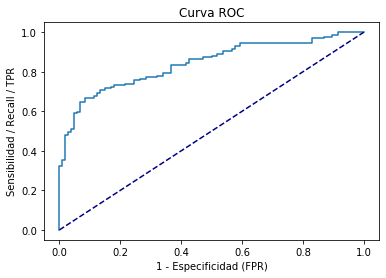

areaUnderROC test: 0.8294653431842536


In [20]:
#from pyspark.sql.functions import udf
#from pyspark.sql.types import FloatType
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

second_element = udf(lambda v: float(v[1]), FloatType())
pred2 = pred_df_test.withColumn('probs', second_element('probability'))

pred2.show(10)

# Gráfica
pred2 = pred2.sample(False, fraction=0.1, seed=30).select('label', 'probs').toPandas()
fpr, tpr, _ = roc_curve(pred2['label'], pred2['probs'])

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--')
plt.xlabel('1 - Especificidad (FPR)')
plt.ylabel('Sensibilidad / Recall / TPR')
plt.title('Curva ROC')
plt.show()

print('areaUnderROC test: {0}'.format(ev.evaluate(pred_df_test, {ev.metricName: 'areaUnderROC'})))

El valor del área bajo la curva nos da una idea del poder de clasificación del modelo:

- ~ 1 tenemos un clasificador perfecto.
- ~ 0,5 nos encontramos con un clasificador aleatorio.
- ~ 0 nuestro modelo es un clasificador invertido.

Veamos qué clasificación obtenemos según nuestro modelo para el dataset de objetos no etiquetados. Primero que nada transformamos el `target` a `label` como hemos hecho para los datos etiquetados.

In [21]:
df_unlabeled = pca_data_unlabeled.withColumn('label', (pca_data_unlabeled['target'] - 1).astype('double'))['dr7objid', 'pca_scaled_features', 'label']
df_unlabeled.dtypes

[('dr7objid', 'string'),
 ('pca_scaled_features', 'vector'),
 ('label', 'double')]

Aplicamos el modelo entrenado con el conjunto de datos etiquetados sobre los datos `pca_df_unlabeled` y usamos la función `groupBy` para ver cuántos objetos hay de cada clase en la predicción:

In [22]:
pred_df_unlabeled = lr_model.transform(df_unlabeled)
pred_df_unlabeled.groupBy('prediction').count().sort('prediction').show()

+----------+-----+
|prediction|count|
+----------+-----+
|       0.0|  830|
|       1.0| 1170|
+----------+-----+



Veamos a continuación un conjunto de imágenes clasificadas.

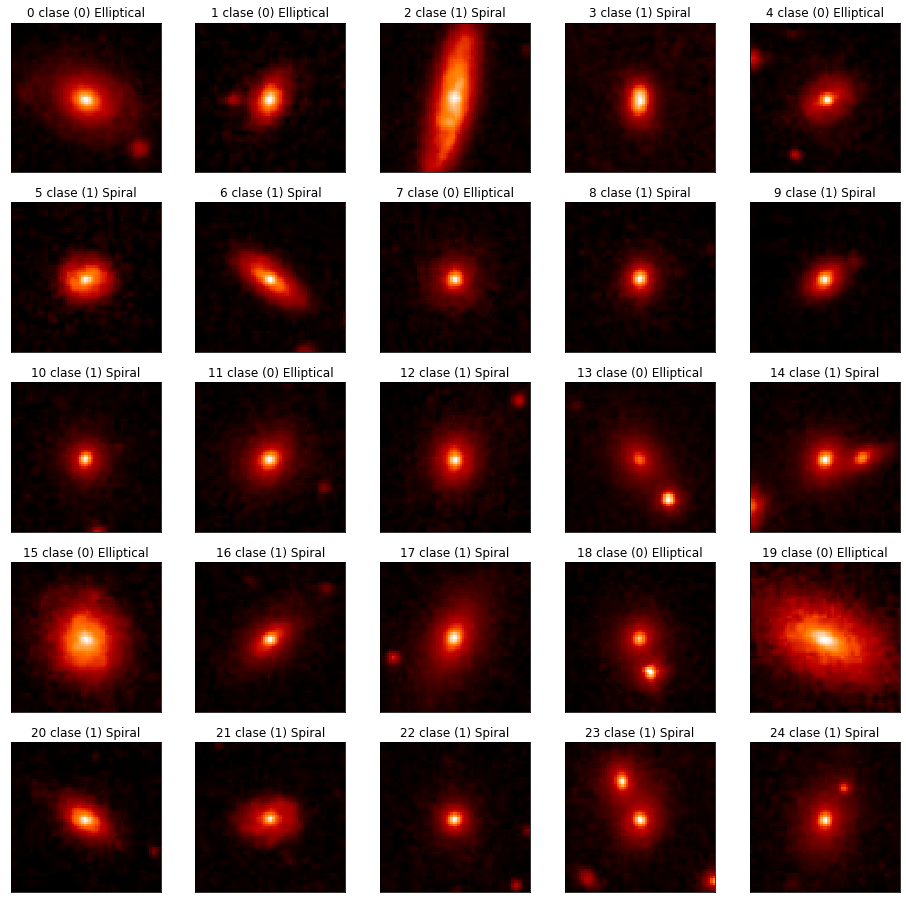

In [23]:
import cv2
obj = pred_df_unlabeled.select('dr7objid', 'prediction').toPandas()

fig, ax = plt.subplots(5, 5, figsize=(16, 16))
for i, axi in enumerate(ax.flat):
    img = cv2.imread('image-galaxyzoo/'+obj["dr7objid"][i]+'.png', 0)
    axi.imshow(img, interpolation='nearest', cmap='gist_heat')
    #axi.imshow(img, interpolation='nearest', cmap='binary')
    if obj["prediction"][i] == 0:
        axi.set_title(str(i)+" clase (0) Elliptical")
    else:
        axi.set_title(str(i)+" clase (1) Spiral")
    axi.set(xticks=[], yticks=[])

Para finalizar guardamos nuestro modelo de regresión logística.

In [24]:
#lr_model.save('models/multilayer-perceptron-galaxy')
lr_model.write().overwrite().save('models/logistic-regression-galaxy')

Y podemos recuperarlo mediante la clase `LogisticRegressionModel`.

In [25]:
from pyspark.ml.classification import LogisticRegressionModel

lr2 = LogisticRegressionModel.load('models/logistic-regression-galaxy')
print(lr2.coefficients[0] == lr_model.coefficients[0])

True


<div id='perceptron' />

### Red Neuronal - Perceptrón Multicapa

Existen multitud de algoritmos de aprendijaze diferentes y cada uno de ellos puede rendir mejor o peor dependiendo de la tipología y distribución de los datos, la finalidad del modelo, el porcentaje de positivos, etc. Por este motivo es conveniente que valoremos la utilización de otros métodos aún obtenido un porcentaje de aciertos razonablemente bueno mediante un modelo de regresión logística.

Una de las tipologías de algoritmos más utilizadas para la clasificación de imágenes es la red neuronal. Hoy en día existen multitud de paquetes y arquitecturas de redes neuronales bastante eficientes para la clasificación de imágenes (por ejemplo redes CNN), sin embargo, en esta sección nos centraremos en una red más simple basada en el método `feedforward` llamada **perceptrón multicapa**.

##### Entrenamiento

Primero tenemos que definir la estructura de nuestra red neuronal. Una red neuronal está compuesta por capas. A su vez cada capa se compone por un conjunto de nodos. En PYSPARK, ésta estructura se define a través de una lista en que cada valor representa el número de nodos de la capa. Así pues, la lista `[5, 10, 1]` define una red neuronal de tres capas con 5, 10 y 1 nodos respecivamente mientras que la lista `[20, 10, 5, 2]` define una red de 4 capas con 20, 10, 5 y 2 nodos.

Las redes neuronales tienen 3 tipos de capas:

- Capa de entrada: solo hay una y debe tener tantos nodos como features (atributos) tenemos en el dataset. Corresponde a la primera posición de la lista.

- Capas ocultas: pueden ser varias y no tienen ninguna restricción en cuanto al número de capas ni de nodos. En general, cuantas más capas ocultas haya, más preciso será el algoritmo (aunque más costoso de entrenar).

- Capa de salida: solo hay una y debe tener tantos nodos como clases tengamos en el dataset. Corresponde a la última posición de la lista.

Así pues, para nuestro caso deberemos configurar una red neuronal con una estructura de este tipo: `[64, ..., 2]`

In [26]:
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator as MCE

start_time = time.time()

# Usaremos los mismos datos pred_df_labeled/pred_df_unlabeled y train/test

layers = [64, 32, 16, 8, 2]
mlp = MultilayerPerceptronClassifier(labelCol='label',
                                     featuresCol='pca_scaled_features',
                                     maxIter=100, 
                                     layers=layers, 
                                     seed=30)

mlp_model = mlp.fit(df_train)
pred_df_mlp_labeled_train = mlp_model.transform(df_train)
pred_df_mlp_labeled_test = mlp_model.transform(df_test)

pred_df_mlp_labeled_train.show(5)

evaluator = MCE(metricName="accuracy")
print('Accuracy: ', MCE(metricName = "weightedRecall").evaluate(pred_df_mlp_labeled_test))
print('Tiempo de ejecución del modelo: ', (time.time() - start_time) / 60, 'segundos')

+------------------+--------------------+-----+--------------------+--------------------+----------+
|          dr7objid| pca_scaled_features|label|       rawPrediction|         probability|prediction|
+------------------+--------------------+-----+--------------------+--------------------+----------+
|587722952767373781|[3.63106211655576...|  1.0|[-2.0715108516198...|[0.04996002429907...|       1.0|
|587722981753421997|[0.94133164111899...|  1.0|[-4.3157933261707...|[3.82197009807514...|       1.0|
|587722982271483931|[0.17135870573141...|  1.0|[-2.3406439368326...|[0.02996608259944...|       1.0|
|587722983366328355|[2.46969415400133...|  1.0|[-4.5611321245776...|[2.34203790465190...|       1.0|
|587722983372292306|[-4.5651427400731...|  1.0|[-1.9438712665970...|[0.05573986246341...|       1.0|
+------------------+--------------------+-----+--------------------+--------------------+----------+
only showing top 5 rows

Accuracy:  0.926112510495382
Tiempo de ejecución del modelo:  1.26

In [27]:
confussion_matrix(pred_df_mlp_labeled_test, label_col='label', pred_col='prediction')

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|  0.0|       0.0| 1117|
|  0.0|       1.0|   73|
|  1.0|       0.0|  103|
|  1.0|       1.0| 1089|
+-----+----------+-----+

Prevalencia:  0.5004198152812762
Sensibilidad/Recall:  0.9135906040268457
Especificidad:  0.938655462184874
Precision:  0.9371772805507745
Accuracy:  0.926112510495382


DataFrame[label: double, prediction: double, count: bigint]

Vemos que el porcentaje de aciertos se ha incrementado con respecto al algoritmo de regresión logística. Ahora tenemos cerca de un 93% de aciertos, lo que equivale a más de un 15% de mejora en la predicción.

Aplicamos el modelo a los datos no etiquetados:

In [28]:
pred_df_mlp_unlabeled = mlp_model.transform(df_unlabeled)
print('Predicción Perceptrón Multicapa:')
pred_df_mlp_unlabeled.groupBy('prediction').count().sort('prediction').show()

Predicción Perceptrón Multicapa:
+----------+-----+
|prediction|count|
+----------+-----+
|       0.0| 1354|
|       1.0|  646|
+----------+-----+



El número de predicciones para la clase `0` (galaxia elíptica) prácticamente se duplica con respecto a las predicciones de nuestro modelo de regresión logística.

In [29]:
print('Predicción Regresión Logística:')
pred_df_unlabeled.groupBy('prediction').count().sort('prediction').show()

Predicción Regresión Logística:
+----------+-----+
|prediction|count|
+----------+-----+
|       0.0|  830|
|       1.0| 1170|
+----------+-----+



Tenemos entonces que el modelo que tiene mayor `accuracy` predice mayor cantidad de galaxias elípticas sobre las galaxias que los usuarios no han podido clasificar. Intuitivamente podemos pensar que los resultados tienen sentido (y así parece confirmarlo el modelo). Ahondemos en esta cuestión: si tenemos dudas sobre una imagen, será porque no logramos identificar con claridad la espiral de la galaxia (o la barra si corresponde con una *galaxia espiral barrada*). Por lo tanto, tendríamos la sospecha de que dicha espiral está "camuflada" por la distribución de brillo alrededor del núcleo. Efectivamente esta es la definición que estamos dando para las galaxias elípticas: aquellas que no tienen estructura y sobre las que no logramos identificar una distribución más allá de un punto con cierto halo circular (ya que el brillo tiende a ser homogéneo alrededor de este punto).

Una conslusión interesante que nos podría estar dando nuestro modelo es la siguiente: ¿Hay mayor proporción de galaxias elípticas en nuestro Universo? Sin embargo, no podemos responder esta pregunta sin antes aplicar técnicas estadísticas más sofisticadas sobre nuestro dataset de imágenes (realmente representan una muestra significativa?). Por otro lado, si pensamos en términos físicos (en concreto física de fluidos) la respuesta es un rotundo NO ya que la mayoría de galaxias tienen forma de disco y son espirales.

A continuación comparamos nuestro nuevo modelo con las imágenes que clasificamos previamente en el modelo de regresión logística.

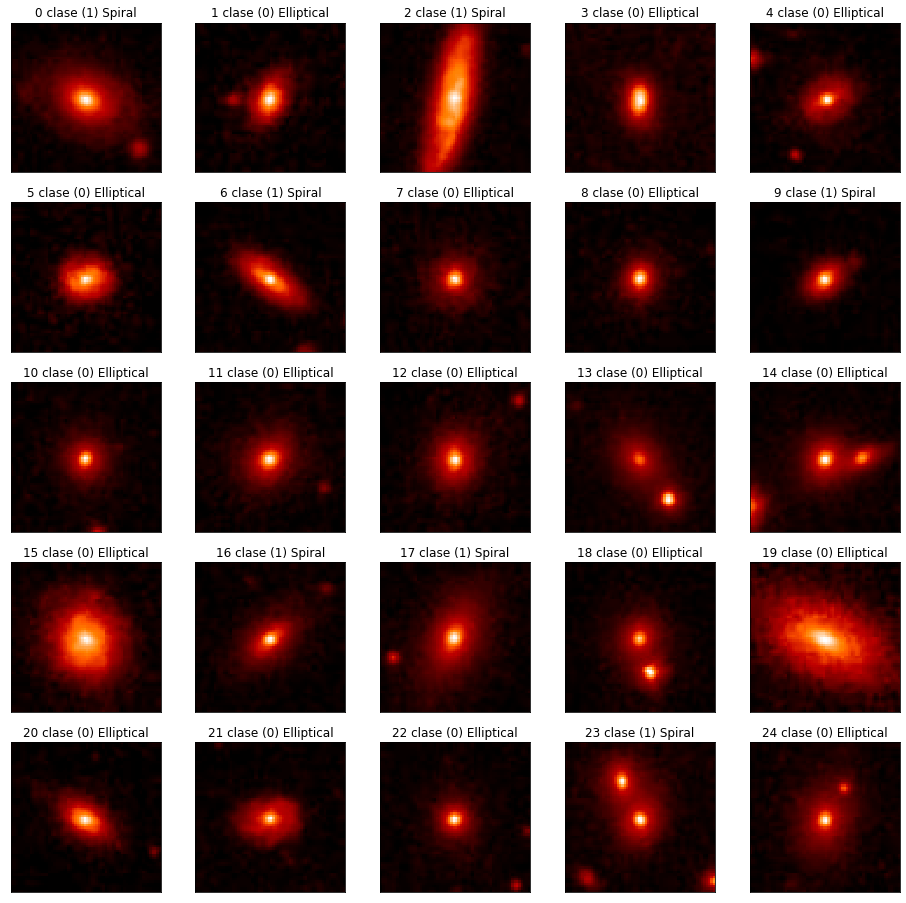

In [30]:
#import cv2
obj = pred_df_mlp_unlabeled.select('dr7objid', 'prediction').toPandas()

fig, ax = plt.subplots(5, 5, figsize=(16, 16))
for i, axi in enumerate(ax.flat):
    img = cv2.imread('image-galaxyzoo/'+obj["dr7objid"][i]+'.png', 0)
    axi.imshow(img, interpolation='nearest', cmap='gist_heat')
    #axi.imshow(img, interpolation='nearest', cmap='binary')
    if obj["prediction"][i] == 0:
        axi.set_title(str(i)+" clase (0) Elliptical")
    else:
        axi.set_title(str(i)+" clase (1) Spiral")
    axi.set(xticks=[], yticks=[])

Guardamos nuestro modelo para clasificaciones futuras.

In [31]:
#mlp_model.save('models/multilayer-perceptron-galaxy')
mlp_model.write().overwrite().save('models/multilayer-perceptron-galaxy')

In [32]:
from pyspark.ml.classification import MultilayerPerceptronClassificationModel

mlp2 = MultilayerPerceptronClassificationModel.load('models/multilayer-perceptron-galaxy')
print(mlp2.layers == mlp_model.layers)
print(mlp2.weights == mlp_model.weights)

True
True


<div id='conclusion' />

## Conclusión final

Tal como comentamos al principio de este trabajo, nuestra idea inicial era construir un **producto** Big Data que pudiera implementarse fácil y rápidamente, y que a su vez sirviese a científicos e investigadores como plataforma para ampliar el conocimiento sobre el mundo que nos rodea. Con este propósito en mente hemos intentado abarcar los siguientes puntos:

1. Introducción teórica sobre los tipos de galaxias y relación con el mundo Big Data.


2. Planteamiento del problema y retos que supone la gestión de la basta cantidad de datos disponibles. Descripción de la necesidad de algoritmos y programas automáticos para llevar a cabo la clasificación de las imágenes tomadas por los telescopios.


3. Descarga y configuración de las herramientas que utilizamos en la construcción del producto: ecosistema Cloudera (HADDOP, YARN, HDFS, HIVE, HUE, IMPALA, SPARK), contenedores Docker, plataforma de análisis Anaconda, etc.
    
    
4. Descarga y almacenamiento de datos a gran escala.
    
    4.1 Explicación de cómo llevar a cabo un almacenamiento en HDFS.
    
    4.2 Explicación de qué es el modelo realacional para bases de datos y cómo hacer un almacenamiento en HIVE.
    
    
5. Carga y visualización de datos. Principalmente mediante HUE para hacer consultas, análisis exploratorio y visualización.
    
    
6. Desarrollo de modelos.

    6.1 Reducción de la dimensionalidad mediante PCA.
    
    6.2 Modelo de clasificación mediante Regresión Logística.
    
    6.3 Modelo de clasificación mediante una red neuronal Perceptrón Multicapa.
    
    6.4 Comparación de modelos mediante métricas tales como matriz de confusión y curva ROC.
    
    
7. Otras tareas como pueden ser desarrollo de scripts para descarga de herramientas, datos e imágenes, construcción de datasets y funciones.

---

<div id='mejoras' />

#### Posibles mejoras

Cabe destacar que quizás no hemos profundizado lo suficiente en algunos de estos puntos. A este respecto cabe citar las siguientes:

- Hacer una amplia explicación del conjunto de herramientas presentes en el ecosistema Cloudera que no han sido mencionadas y que además podrían ser de gran utilidad en un proyecto Big Data de estas características (Solr, Flume, Sqoop, Zeppelin, etc). 


- También sería posible explicar la configuración para la ingesta de datos en HDFS y HIVE de manera automática mediante Flume y Sqoop, respectivamente.


- Presentar un mayor número de gráficas y visualizaciones de los datos almacenados en HIVE (dataset de características y parámetros de galaxias y telescopios).


- Comparación con otros modelos basados en deep learninig (por ejemplo una red CNN).


A pesar de cierto déficit en la profundidad entorno a estas cuestiones, es menester mencionar que la máxima durante este trabajo consistió en hacer una buena configuración del entorno Cloudera con sus debidas explicaciones; así como de hacer un desarrollo de código lo más extenso posible (HUE-HIVE, SPARK, scripts, modelos, etc).

---

<div id='dificultades' />

#### Dificultades y limitaciones

Cuanto más grande sea el proyecto, más dificultades podemos encontrar en el camino. 

La principal dificultad en el transcurso de este proyecto fue la elección del entorno y su configuración. La premisa es que debíamos trabajar en un ecosistema Big Data (pues de eso trata este máster) y dado que ya hemos visto cómo trabajar en Hortonworks durante el máster, consideramos que sería buena idea conocer su "hermano gemelo" Cloudera. 

Tomada la desición, la siguiente fue sobre qué entorno elegir: ¿máquina virtual, docker, Cloud? La elección de docker se debió a características técnicas de la máquina. A pesar de ello se presentó el problema de la falta de memoria RAM, lo cual supuso un punto de inflexión durante el trabajo, pues implicaba reconsiderar todo el proyecto en sí mismo. En resumen, suponía abandonar el enfoque Data Engineer (o Architect, según se mire) en favor de una vertiente más Data Science para así enfocarnos más en el desarrollo y comparativa de modelos. Pero como dijimos, la intención era hacer un producto Big Data. Es por esto y para seguir trabajando con docker y SPARK por la que nos decantamos por usar el stack de *Docker Jupyter Notebooks* para la parte de modelo.

Y por último, el tercer gran inconveniente fue la siguiente pregunta: ¿de donde sacamos las imágenes? El proyecto *GalaxyZoo* ofrece el dataset de clasificaciones en base al *objid* de la imagen (identificador de la imagen) y en formato `.csv`. El único sitio donde recurrir a las imágenes era en la web del proyecto *SDSS*. Sin embargo, para descargar las imágenes en conjunto (*bulk*) solo es posible de las siguientes maneras:

- A través de una plataforma mediante consultas SQL sobre la que hay que [registrarse](https://skyserver.sdss.org/CasJobs/). Supone además descargar [software](http://skyserver.sdss.org/dr14/en/help/download/downloadhome.aspx) específico y conocer la estructura de su base de datos.


- A través de [enlaces](https://data.sdss.org/datamodel/) y/o [comandos](https://www.sdss.org/dr14/data_access/bulk/) por consola. Lo cual descargaba los datos en formato [`.fits`](https://es.wikipedia.org/wiki/FITS) (típico en el ámbito de la astronomía). Lo cual suponía el trabajo extra de saber manipular este formato de ficheros.


- La opción más viable era en esta [web](https://dr12.sdss.org/bulkFields). La cual ofrece la posibilidad de descargar los datos en *bulk*. Sin embargo, aún seleccionando los valores adecuados de `name, ra, dec` no era posible descargar imágenes aceptables con el tamaño adecuado (la calidad de la imagen era notable y de difícil procesamiento para reducirlas a `64x64` píxeles).


Finalmente encontramos la manera de hacer [web scraping](https://es.wikipedia.org/wiki/Web_scraping) en la siguiente [web](https://skyserver.sdss.org/dr14/en/tools/chart/listinfo.aspx) del proyecto *SDSS* para la descarga automática.